In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Krishna']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
1434,1434,16.71,80.55,Krishna,G Konduru,C.H.Madhavaram,Black,8.04,0.29,0.49,...,0.63,6.23,1.77,15.20,0.020030,0.015637,0.154926,0.062061,-0.030097,Cotton
1435,1435,16.70,80.55,Krishna,G Konduru,C.H.Madhavaram,Black,7.98,0.56,0.40,...,0.55,3.70,1.06,11.12,0.022201,0.017797,0.155367,0.069264,-0.033473,Chilli
1436,1436,16.71,80.55,Krishna,G Konduru,C.H.Madhavaram,Black,8.08,0.42,0.43,...,1.19,10.85,2.37,22.73,0.020030,0.015637,0.154926,0.062061,-0.030097,Vegetables
1437,1437,16.71,80.55,Krishna,G Konduru,C.H.Madhavaram,Black,8.11,0.46,0.44,...,1.46,9.48,2.04,26.57,0.020030,0.015637,0.154926,0.062061,-0.030097,Vegetables
1438,1438,16.71,80.61,Krishna,G Konduru,Chevutur,Black,8.54,0.21,0.25,...,1.10,4.19,1.09,7.12,0.019861,0.015283,0.141737,0.064535,-0.031259,Cotton


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'NDVI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,7.877293,0.881992,0.599737,21.031053,211.180451,5135.481203,1432.281955,105.633797,1.124436,1.755677,34.976241,7.602293,22.065714,0.260500
std,0.523106,1.572241,0.209099,14.304957,154.542433,1528.346835,609.168496,147.923428,1.016811,0.642349,28.610180,4.824919,12.788403,0.197005
min,6.070000,0.110000,0.160000,1.360000,77.000000,635.000000,165.000000,4.450000,0.140000,0.540000,1.400000,0.030000,5.500000,-0.346319
25%,7.620000,0.370000,0.430000,11.580000,133.000000,4369.750000,967.750000,23.857500,0.542500,1.300000,8.815000,2.347500,12.822500,0.097115
50%,7.980000,0.530000,0.610000,16.725000,171.000000,5295.000000,1435.500000,50.270000,0.900000,1.735000,31.950000,8.070000,19.520000,0.233954
75%,8.210000,0.807500,0.740000,27.590000,231.750000,6240.750000,1813.000000,118.027500,1.317500,2.102500,49.512500,11.770000,26.840000,0.341718
max,9.090000,20.300000,1.150000,105.720000,1572.000000,9718.000000,3730.000000,995.940000,8.840000,3.750000,166.850000,19.470000,88.540000,1.161593


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Red', 'BLACK'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black', 'BLACK'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 250, 'Red Soil': 16}

<BarContainer object of 2 artists>

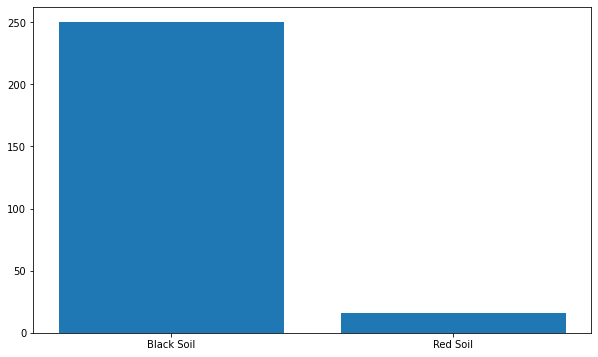

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Cotton', 'Chilli', 'Vegetables', 'cotton', 'chill', 'Paddy',
       'Vegetable', 'Black gram', 'Maize', 'PULSE', 'MAZI', 'maize',
       'Mazi'], dtype=object)

In [14]:
df['Crop'].value_counts()

PULSE         80
Cotton        63
Black gram    52
Maize         31
Mazi           9
Paddy          7
Vegetables     7
Chilli         6
cotton         5
MAZI           2
Vegetable      2
maize          1
chill          1
Name: Crop, dtype: int64

Pulse        80
Cotton       68
BlackGram    52
Maize        43
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

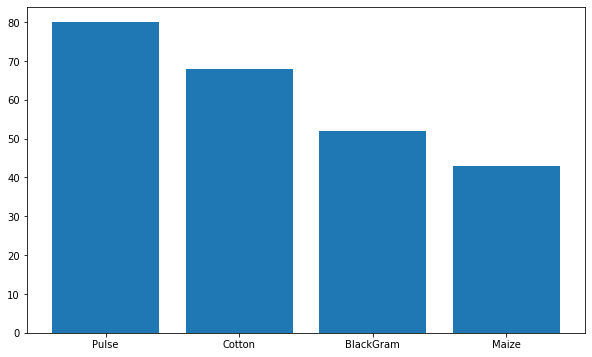

In [15]:
df['Crop'] = df['Crop'].replace('chill', 'Chilli')
df['Crop'] = df['Crop'].replace(['MAZI', 'maize', 'Mazi'], 'Maize')
df['Crop'] = df['Crop'].replace('cotton', 'Cotton')
df['Crop'] = df['Crop'].replace('Black gram', 'BlackGram')
df['Crop'] = df['Crop'].replace('PULSE', 'Pulse')
df = df[(df['Crop'] != 'Vegetable') & (df['Crop'] != 'Vegetables') & (df['Crop'] != 'Chilli') & (df['Crop'] != 'Paddy')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
pH,1.000000,-0.194779,-0.397251,-0.345533,0.059415,-0.247552,-0.340166,-0.291813,-0.210989,-0.290784,-0.765760,-0.622046,-0.555247,-0.243175
EC,-0.194779,1.000000,0.224075,0.201661,0.273177,0.169868,0.226847,0.718952,0.072944,0.273555,0.027884,0.054795,0.087538,0.052122
OC,-0.397251,0.224075,1.000000,0.510703,0.251032,0.325660,0.292660,0.482694,0.490665,0.393414,0.545253,0.632245,0.325593,0.375145
P,-0.345533,0.201661,0.510703,1.000000,0.377933,0.005470,0.134836,0.294004,0.477350,0.353680,0.520016,0.341507,0.397529,0.239735
K,0.059415,0.273177,0.251032,0.377933,1.000000,-0.070437,-0.003110,0.328830,0.323908,0.146462,0.002124,-0.036796,0.117925,-0.035000
Ca,-0.247552,0.169868,0.325660,0.005470,-0.070437,1.000000,0.805193,0.135697,0.072989,0.361858,0.327271,0.637827,0.320087,0.463742
Mg,-0.340166,0.226847,0.292660,0.134836,-0.003110,0.805193,1.000000,0.145356,0.077283,0.660054,0.426279,0.706528,0.448127,0.538999
S,-0.291813,0.718952,0.482694,0.294004,0.328830,0.135697,0.145356,1.000000,0.223393,0.299685,0.183475,0.172219,0.110838,0.157598
Zn,-0.210989,0.072944,0.490665,0.477350,0.323908,0.072989,0.077283,0.223393,1.000000,0.209275,0.427066,0.367775,0.268356,0.196156
B,-0.290784,0.273555,0.393414,0.353680,0.146462,0.361858,0.660054,0.299685,0.209275,1.000000,0.410415,0.567515,0.420113,0.434733


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['P', 'Mg', 'S', 'B', 'Fe', 'Cu', 'Mn', 'GCI']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'K', 'Ca', 'Zn', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     K      Ca    Zn  Black Soil  Red Soil
1434  8.04  0.29  0.49  98.0  4662.0  0.34           1         0
1434    Cotton
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:7] = sc1.fit_transform(X[:, 0:7])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [23]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [24]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [25]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6557377049180327


In [26]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 73.60 %
Standard Deviation: 8.87 %


# Decision Tree Classifier

In [27]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6557377049180327


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 63.25 %
Standard Deviation: 12.09 %


# Random Forest Classifier

In [46]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [48]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7213114754098361


In [49]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.29 %
Standard Deviation: 10.66 %


In [35]:
pickle.dump(clf3, open('Krishna_model.pkl', 'wb'))
pickle.dump(sc1, open('Krishna_scaler.pkl', 'wb'))

# XGBoost

In [50]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [51]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [52]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7213114754098361


In [53]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [54]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.60 %
Standard Deviation: 11.06 %


# Multi-layer Perceptron Classifier

In [55]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [56]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [57]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8186813186813187
Testing Accuracy:  0.7049180327868853


In [58]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.74 %
Standard Deviation: 9.82 %


# Catboost

In [45]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.0849361	total: 129ms	remaining: 12.8s
1:	learn: 0.9025885	total: 130ms	remaining: 6.39s
2:	learn: 0.8328787	total: 131ms	remaining: 4.24s
3:	learn: 0.7902919	total: 132ms	remaining: 3.16s
4:	learn: 0.7265109	total: 132ms	remaining: 2.51s
5:	learn: 0.6655892	total: 133ms	remaining: 2.08s
6:	learn: 0.6359107	total: 133ms	remaining: 1.77s
7:	learn: 0.5737040	total: 134ms	remaining: 1.53s
8:	learn: 0.5449550	total: 134ms	remaining: 1.36s
9:	learn: 0.5324662	total: 135ms	remaining: 1.21s
10:	learn: 0.5039217	total: 135ms	remaining: 1.09s
11:	learn: 0.4941197	total: 136ms	remaining: 995ms
12:	learn: 0.4809131	total: 136ms	remaining: 911ms
13:	learn: 0.4682459	total: 137ms	remaining: 840ms
14:	learn: 0.4416567	total: 137ms	remaining: 778ms
15:	learn: 0.4369792	total: 138ms	remaining: 723ms
16:	learn: 0.4309624	total: 138ms	remaining: 675ms
17:	learn: 0.4271048	total: 139ms	remaining: 632ms
18:	learn: 0.4242666	total: 139ms	remaining: 594ms
19:	learn: 0.4192687	total: 140ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8867025898
bestIteration = 99

Training on fold [1/5]

bestTest = 0.9158785444
bestIteration = 99

Training on fold [2/5]

bestTest = 0.9146540254
bestIteration = 99

Training on fold [3/5]

bestTest = 0.9920820573
bestIteration = 99

Training on fold [4/5]

bestTest = 0.9965892773
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3717743	test: 1.3776330	best: 1.3776330 (0)	total: 1.03ms	remaining: 1.03s
1:	learn: 1.3562375	test: 1.3632624	best: 1.3632624 (1)	total: 2.1ms	remaining: 1.05s
2:	learn: 1.3426826	test: 1.3535263	best: 1.3535263 (2)	total: 2.84ms	remaining: 944ms
3:	learn: 1.3239986	test: 1.3380860	best: 1.3380860 (3)	total: 3.65ms	remaining: 909ms
4:	learn: 1.3113469	test: 1.3277428	best: 1.3277428 (4)	total: 4.52ms	remaining: 900ms
5:	learn: 1.2938154	test: 1.3129700	best: 1.3129700 (5)	total: 5.38ms	remaining: 891ms
6:	learn: 1.2750237	test: 1.2970141	best: 1.2970141 (6)	total: 6.21ms	remaining: 881ms
7:	learn: 1.2638323	test: 1.2851518	best: 1.2851518 (7)	total: 7.04ms	remaining: 874ms
8:	learn: 1.2539812	test: 1.2773459	best: 1.2773459 (8)	total: 7.9ms	remaining: 870ms
9:	learn: 1.2387804	test: 1.2664549	best: 1.2664549 (9)	total: 8.81ms	remaining: 873ms
10:	learn: 1.2253537	test: 1.2549909	best: 1.2549909 (10)	total: 9.81ms	remaining: 882ms
11:	learn: 1.2154178	test: 1.2480409	best: 

183:	learn: 0.5223233	test: 0.8456568	best: 0.8451922 (181)	total: 171ms	remaining: 758ms
184:	learn: 0.5213049	test: 0.8448358	best: 0.8448358 (184)	total: 172ms	remaining: 757ms
185:	learn: 0.5200713	test: 0.8451328	best: 0.8448358 (184)	total: 173ms	remaining: 756ms
186:	learn: 0.5188103	test: 0.8442696	best: 0.8442696 (186)	total: 174ms	remaining: 755ms
187:	learn: 0.5167322	test: 0.8441285	best: 0.8441285 (187)	total: 175ms	remaining: 754ms
188:	learn: 0.5150666	test: 0.8431465	best: 0.8431465 (188)	total: 175ms	remaining: 753ms
189:	learn: 0.5134802	test: 0.8421963	best: 0.8421963 (189)	total: 176ms	remaining: 752ms
190:	learn: 0.5117244	test: 0.8416752	best: 0.8416752 (190)	total: 177ms	remaining: 750ms
191:	learn: 0.5099595	test: 0.8408516	best: 0.8408516 (191)	total: 178ms	remaining: 749ms
192:	learn: 0.5085012	test: 0.8407777	best: 0.8407777 (192)	total: 179ms	remaining: 749ms
193:	learn: 0.5068245	test: 0.8400672	best: 0.8400672 (193)	total: 180ms	remaining: 747ms
194:	learn

363:	learn: 0.3292788	test: 0.8013211	best: 0.8010536 (360)	total: 343ms	remaining: 600ms
364:	learn: 0.3285354	test: 0.8024988	best: 0.8010536 (360)	total: 344ms	remaining: 599ms
365:	learn: 0.3277340	test: 0.8014004	best: 0.8010536 (360)	total: 345ms	remaining: 598ms
366:	learn: 0.3274427	test: 0.8012357	best: 0.8010536 (360)	total: 347ms	remaining: 598ms
367:	learn: 0.3265884	test: 0.8005525	best: 0.8005525 (367)	total: 348ms	remaining: 597ms
368:	learn: 0.3262371	test: 0.8002240	best: 0.8002240 (368)	total: 349ms	remaining: 596ms
369:	learn: 0.3259010	test: 0.8002372	best: 0.8002240 (368)	total: 350ms	remaining: 596ms
370:	learn: 0.3251429	test: 0.8000946	best: 0.8000946 (370)	total: 351ms	remaining: 595ms
371:	learn: 0.3241655	test: 0.8007862	best: 0.8000946 (370)	total: 352ms	remaining: 594ms
372:	learn: 0.3232466	test: 0.7996371	best: 0.7996371 (372)	total: 353ms	remaining: 593ms
373:	learn: 0.3229877	test: 0.7994556	best: 0.7994556 (373)	total: 354ms	remaining: 593ms
374:	learn

531:	learn: 0.2395444	test: 0.7785602	best: 0.7785602 (531)	total: 511ms	remaining: 449ms
532:	learn: 0.2391264	test: 0.7783537	best: 0.7783537 (532)	total: 512ms	remaining: 448ms
533:	learn: 0.2386060	test: 0.7789763	best: 0.7783537 (532)	total: 513ms	remaining: 448ms
534:	learn: 0.2382649	test: 0.7780430	best: 0.7780430 (534)	total: 514ms	remaining: 447ms
535:	learn: 0.2379517	test: 0.7776695	best: 0.7776695 (535)	total: 515ms	remaining: 446ms
536:	learn: 0.2377487	test: 0.7776169	best: 0.7776169 (536)	total: 516ms	remaining: 445ms
537:	learn: 0.2375039	test: 0.7777655	best: 0.7776169 (536)	total: 517ms	remaining: 444ms
538:	learn: 0.2370107	test: 0.7767354	best: 0.7767354 (538)	total: 518ms	remaining: 443ms
539:	learn: 0.2367752	test: 0.7764101	best: 0.7764101 (539)	total: 518ms	remaining: 442ms
540:	learn: 0.2365605	test: 0.7763779	best: 0.7763779 (540)	total: 519ms	remaining: 441ms
541:	learn: 0.2362783	test: 0.7756948	best: 0.7756948 (541)	total: 520ms	remaining: 440ms
542:	learn

722:	learn: 0.1818514	test: 0.7697949	best: 0.7693046 (716)	total: 687ms	remaining: 263ms
723:	learn: 0.1816374	test: 0.7698078	best: 0.7693046 (716)	total: 688ms	remaining: 262ms
724:	learn: 0.1815375	test: 0.7698538	best: 0.7693046 (716)	total: 689ms	remaining: 261ms
725:	learn: 0.1812267	test: 0.7695540	best: 0.7693046 (716)	total: 690ms	remaining: 260ms
726:	learn: 0.1810276	test: 0.7699499	best: 0.7693046 (716)	total: 691ms	remaining: 259ms
727:	learn: 0.1808011	test: 0.7705863	best: 0.7693046 (716)	total: 692ms	remaining: 259ms
728:	learn: 0.1807045	test: 0.7708251	best: 0.7693046 (716)	total: 693ms	remaining: 258ms
729:	learn: 0.1805203	test: 0.7710140	best: 0.7693046 (716)	total: 694ms	remaining: 257ms
730:	learn: 0.1801945	test: 0.7700412	best: 0.7693046 (716)	total: 695ms	remaining: 256ms
731:	learn: 0.1800192	test: 0.7702005	best: 0.7693046 (716)	total: 696ms	remaining: 255ms
732:	learn: 0.1799327	test: 0.7702459	best: 0.7693046 (716)	total: 697ms	remaining: 254ms
733:	learn

901:	learn: 0.1431585	test: 0.7783286	best: 0.7693046 (716)	total: 855ms	remaining: 92.9ms
902:	learn: 0.1430127	test: 0.7783233	best: 0.7693046 (716)	total: 857ms	remaining: 92ms
903:	learn: 0.1428017	test: 0.7776131	best: 0.7693046 (716)	total: 858ms	remaining: 91.1ms
904:	learn: 0.1426748	test: 0.7776459	best: 0.7693046 (716)	total: 859ms	remaining: 90.1ms
905:	learn: 0.1424482	test: 0.7776650	best: 0.7693046 (716)	total: 860ms	remaining: 89.2ms
906:	learn: 0.1422646	test: 0.7777724	best: 0.7693046 (716)	total: 861ms	remaining: 88.3ms
907:	learn: 0.1421064	test: 0.7778783	best: 0.7693046 (716)	total: 862ms	remaining: 87.3ms
908:	learn: 0.1419872	test: 0.7778517	best: 0.7693046 (716)	total: 863ms	remaining: 86.4ms
909:	learn: 0.1418184	test: 0.7774779	best: 0.7693046 (716)	total: 864ms	remaining: 85.4ms
910:	learn: 0.1415955	test: 0.7775377	best: 0.7693046 (716)	total: 865ms	remaining: 84.5ms
911:	learn: 0.1414063	test: 0.7774604	best: 0.7693046 (716)	total: 866ms	remaining: 83.5ms
9

72:	learn: 0.4435844	test: 0.8270617	best: 0.8263804 (71)	total: 71.5ms	remaining: 908ms
73:	learn: 0.4407962	test: 0.8243997	best: 0.8243997 (73)	total: 72.6ms	remaining: 909ms
74:	learn: 0.4371908	test: 0.8269416	best: 0.8243997 (73)	total: 73.7ms	remaining: 909ms
75:	learn: 0.4328673	test: 0.8224031	best: 0.8224031 (75)	total: 74.7ms	remaining: 908ms
76:	learn: 0.4269543	test: 0.8214890	best: 0.8214890 (76)	total: 75.7ms	remaining: 908ms
77:	learn: 0.4206408	test: 0.8215696	best: 0.8214890 (76)	total: 76.7ms	remaining: 906ms
78:	learn: 0.4165681	test: 0.8148280	best: 0.8148280 (78)	total: 77.7ms	remaining: 906ms
79:	learn: 0.4132386	test: 0.8133474	best: 0.8133474 (79)	total: 78.7ms	remaining: 905ms
80:	learn: 0.4096205	test: 0.8140175	best: 0.8133474 (79)	total: 79.6ms	remaining: 903ms
81:	learn: 0.4063109	test: 0.8142508	best: 0.8133474 (79)	total: 80.6ms	remaining: 902ms
82:	learn: 0.4042105	test: 0.8136402	best: 0.8133474 (79)	total: 81.5ms	remaining: 901ms
83:	learn: 0.4005605	

245:	learn: 0.1594750	test: 0.7818311	best: 0.7722019 (212)	total: 239ms	remaining: 732ms
246:	learn: 0.1592297	test: 0.7820224	best: 0.7722019 (212)	total: 240ms	remaining: 731ms
247:	learn: 0.1587804	test: 0.7817514	best: 0.7722019 (212)	total: 241ms	remaining: 729ms
248:	learn: 0.1582292	test: 0.7821869	best: 0.7722019 (212)	total: 242ms	remaining: 728ms
249:	learn: 0.1575602	test: 0.7824589	best: 0.7722019 (212)	total: 243ms	remaining: 728ms
250:	learn: 0.1567838	test: 0.7811307	best: 0.7722019 (212)	total: 244ms	remaining: 727ms
251:	learn: 0.1562923	test: 0.7824143	best: 0.7722019 (212)	total: 244ms	remaining: 726ms
252:	learn: 0.1557695	test: 0.7822185	best: 0.7722019 (212)	total: 245ms	remaining: 724ms
253:	learn: 0.1553756	test: 0.7812282	best: 0.7722019 (212)	total: 246ms	remaining: 723ms
254:	learn: 0.1551017	test: 0.7811265	best: 0.7722019 (212)	total: 247ms	remaining: 722ms
255:	learn: 0.1541304	test: 0.7782066	best: 0.7722019 (212)	total: 248ms	remaining: 721ms
256:	learn

422:	learn: 0.0881300	test: 0.7849183	best: 0.7722019 (212)	total: 407ms	remaining: 555ms
423:	learn: 0.0878256	test: 0.7848023	best: 0.7722019 (212)	total: 408ms	remaining: 555ms
424:	learn: 0.0875577	test: 0.7864511	best: 0.7722019 (212)	total: 409ms	remaining: 554ms
425:	learn: 0.0872110	test: 0.7860824	best: 0.7722019 (212)	total: 410ms	remaining: 553ms
426:	learn: 0.0869135	test: 0.7869679	best: 0.7722019 (212)	total: 411ms	remaining: 552ms
427:	learn: 0.0865992	test: 0.7871863	best: 0.7722019 (212)	total: 412ms	remaining: 551ms
428:	learn: 0.0863344	test: 0.7874752	best: 0.7722019 (212)	total: 413ms	remaining: 550ms
429:	learn: 0.0861708	test: 0.7880295	best: 0.7722019 (212)	total: 414ms	remaining: 549ms
430:	learn: 0.0859211	test: 0.7890348	best: 0.7722019 (212)	total: 415ms	remaining: 548ms
431:	learn: 0.0855254	test: 0.7875253	best: 0.7722019 (212)	total: 416ms	remaining: 547ms
432:	learn: 0.0854494	test: 0.7878684	best: 0.7722019 (212)	total: 417ms	remaining: 546ms
433:	learn

608:	learn: 0.0554468	test: 0.8060567	best: 0.7722019 (212)	total: 583ms	remaining: 374ms
609:	learn: 0.0552783	test: 0.8062071	best: 0.7722019 (212)	total: 584ms	remaining: 373ms
610:	learn: 0.0551145	test: 0.8073126	best: 0.7722019 (212)	total: 585ms	remaining: 372ms
611:	learn: 0.0550210	test: 0.8073700	best: 0.7722019 (212)	total: 586ms	remaining: 371ms
612:	learn: 0.0549163	test: 0.8076451	best: 0.7722019 (212)	total: 587ms	remaining: 370ms
613:	learn: 0.0547934	test: 0.8076254	best: 0.7722019 (212)	total: 588ms	remaining: 369ms
614:	learn: 0.0547010	test: 0.8071543	best: 0.7722019 (212)	total: 589ms	remaining: 368ms
615:	learn: 0.0546073	test: 0.8069585	best: 0.7722019 (212)	total: 589ms	remaining: 367ms
616:	learn: 0.0545488	test: 0.8072007	best: 0.7722019 (212)	total: 590ms	remaining: 366ms
617:	learn: 0.0544333	test: 0.8070798	best: 0.7722019 (212)	total: 591ms	remaining: 365ms
618:	learn: 0.0543598	test: 0.8063167	best: 0.7722019 (212)	total: 592ms	remaining: 364ms
619:	learn

789:	learn: 0.0399773	test: 0.8366727	best: 0.7722019 (212)	total: 751ms	remaining: 200ms
790:	learn: 0.0399066	test: 0.8362540	best: 0.7722019 (212)	total: 752ms	remaining: 199ms
791:	learn: 0.0398211	test: 0.8363735	best: 0.7722019 (212)	total: 753ms	remaining: 198ms
792:	learn: 0.0397574	test: 0.8365353	best: 0.7722019 (212)	total: 754ms	remaining: 197ms
793:	learn: 0.0397001	test: 0.8362620	best: 0.7722019 (212)	total: 755ms	remaining: 196ms
794:	learn: 0.0396313	test: 0.8357529	best: 0.7722019 (212)	total: 756ms	remaining: 195ms
795:	learn: 0.0395650	test: 0.8362277	best: 0.7722019 (212)	total: 757ms	remaining: 194ms
796:	learn: 0.0395092	test: 0.8365724	best: 0.7722019 (212)	total: 758ms	remaining: 193ms
797:	learn: 0.0394395	test: 0.8364545	best: 0.7722019 (212)	total: 759ms	remaining: 192ms
798:	learn: 0.0393683	test: 0.8369434	best: 0.7722019 (212)	total: 760ms	remaining: 191ms
799:	learn: 0.0392589	test: 0.8378103	best: 0.7722019 (212)	total: 777ms	remaining: 194ms
800:	learn

957:	learn: 0.0314458	test: 0.8574335	best: 0.7722019 (212)	total: 928ms	remaining: 40.7ms
958:	learn: 0.0314087	test: 0.8572236	best: 0.7722019 (212)	total: 929ms	remaining: 39.7ms
959:	learn: 0.0313391	test: 0.8565416	best: 0.7722019 (212)	total: 930ms	remaining: 38.7ms
960:	learn: 0.0312962	test: 0.8573825	best: 0.7722019 (212)	total: 931ms	remaining: 37.8ms
961:	learn: 0.0312368	test: 0.8582349	best: 0.7722019 (212)	total: 932ms	remaining: 36.8ms
962:	learn: 0.0312072	test: 0.8583451	best: 0.7722019 (212)	total: 933ms	remaining: 35.8ms
963:	learn: 0.0311693	test: 0.8580222	best: 0.7722019 (212)	total: 934ms	remaining: 34.9ms
964:	learn: 0.0311353	test: 0.8579329	best: 0.7722019 (212)	total: 935ms	remaining: 33.9ms
965:	learn: 0.0311020	test: 0.8576383	best: 0.7722019 (212)	total: 936ms	remaining: 32.9ms
966:	learn: 0.0310875	test: 0.8576684	best: 0.7722019 (212)	total: 937ms	remaining: 32ms
967:	learn: 0.0310327	test: 0.8576319	best: 0.7722019 (212)	total: 938ms	remaining: 31ms
968

53:	learn: 0.8575143	test: 1.0310605	best: 1.0310605 (53)	total: 130ms	remaining: 2.27s
54:	learn: 0.8502156	test: 1.0271584	best: 1.0271584 (54)	total: 132ms	remaining: 2.27s
55:	learn: 0.8447272	test: 1.0231412	best: 1.0231412 (55)	total: 134ms	remaining: 2.27s
56:	learn: 0.8394644	test: 1.0206059	best: 1.0206059 (56)	total: 137ms	remaining: 2.26s
57:	learn: 0.8335634	test: 1.0178432	best: 1.0178432 (57)	total: 139ms	remaining: 2.26s
58:	learn: 0.8285320	test: 1.0155985	best: 1.0155985 (58)	total: 141ms	remaining: 2.25s
59:	learn: 0.8229312	test: 1.0128976	best: 1.0128976 (59)	total: 144ms	remaining: 2.25s
60:	learn: 0.8168966	test: 1.0097771	best: 1.0097771 (60)	total: 146ms	remaining: 2.25s
61:	learn: 0.8117057	test: 1.0072441	best: 1.0072441 (61)	total: 149ms	remaining: 2.25s
62:	learn: 0.8066591	test: 1.0039655	best: 1.0039655 (62)	total: 151ms	remaining: 2.25s
63:	learn: 0.8025314	test: 1.0011238	best: 1.0011238 (63)	total: 153ms	remaining: 2.24s
64:	learn: 0.7973123	test: 1.000

212:	learn: 0.4152618	test: 0.8349581	best: 0.8349581 (212)	total: 490ms	remaining: 1.81s
213:	learn: 0.4137593	test: 0.8340705	best: 0.8340705 (213)	total: 492ms	remaining: 1.81s
214:	learn: 0.4122125	test: 0.8343504	best: 0.8340705 (213)	total: 495ms	remaining: 1.81s
215:	learn: 0.4103034	test: 0.8342616	best: 0.8340705 (213)	total: 497ms	remaining: 1.8s
216:	learn: 0.4091678	test: 0.8337323	best: 0.8337323 (216)	total: 499ms	remaining: 1.8s
217:	learn: 0.4074574	test: 0.8330453	best: 0.8330453 (217)	total: 501ms	remaining: 1.8s
218:	learn: 0.4055466	test: 0.8322747	best: 0.8322747 (218)	total: 503ms	remaining: 1.79s
219:	learn: 0.4038298	test: 0.8333907	best: 0.8322747 (218)	total: 506ms	remaining: 1.79s
220:	learn: 0.4021539	test: 0.8336151	best: 0.8322747 (218)	total: 508ms	remaining: 1.79s
221:	learn: 0.4007985	test: 0.8331258	best: 0.8322747 (218)	total: 511ms	remaining: 1.79s
222:	learn: 0.3994190	test: 0.8329511	best: 0.8322747 (218)	total: 514ms	remaining: 1.79s
223:	learn: 0

375:	learn: 0.2476007	test: 0.7939888	best: 0.7918890 (370)	total: 845ms	remaining: 1.4s
376:	learn: 0.2468780	test: 0.7942978	best: 0.7918890 (370)	total: 848ms	remaining: 1.4s
377:	learn: 0.2465632	test: 0.7935927	best: 0.7918890 (370)	total: 849ms	remaining: 1.4s
378:	learn: 0.2458388	test: 0.7933552	best: 0.7918890 (370)	total: 852ms	remaining: 1.4s
379:	learn: 0.2453858	test: 0.7938532	best: 0.7918890 (370)	total: 854ms	remaining: 1.39s
380:	learn: 0.2446364	test: 0.7942980	best: 0.7918890 (370)	total: 857ms	remaining: 1.39s
381:	learn: 0.2440555	test: 0.7941982	best: 0.7918890 (370)	total: 859ms	remaining: 1.39s
382:	learn: 0.2434332	test: 0.7935949	best: 0.7918890 (370)	total: 861ms	remaining: 1.39s
383:	learn: 0.2426849	test: 0.7939310	best: 0.7918890 (370)	total: 864ms	remaining: 1.39s
384:	learn: 0.2421039	test: 0.7941324	best: 0.7918890 (370)	total: 866ms	remaining: 1.38s
385:	learn: 0.2413668	test: 0.7939599	best: 0.7918890 (370)	total: 868ms	remaining: 1.38s
386:	learn: 0.

540:	learn: 0.1680151	test: 0.7844589	best: 0.7819332 (507)	total: 1.2s	remaining: 1.02s
541:	learn: 0.1676468	test: 0.7847152	best: 0.7819332 (507)	total: 1.2s	remaining: 1.02s
542:	learn: 0.1672915	test: 0.7848899	best: 0.7819332 (507)	total: 1.21s	remaining: 1.01s
543:	learn: 0.1672179	test: 0.7848291	best: 0.7819332 (507)	total: 1.21s	remaining: 1.01s
544:	learn: 0.1667638	test: 0.7849124	best: 0.7819332 (507)	total: 1.21s	remaining: 1.01s
545:	learn: 0.1664300	test: 0.7846106	best: 0.7819332 (507)	total: 1.21s	remaining: 1.01s
546:	learn: 0.1661573	test: 0.7847127	best: 0.7819332 (507)	total: 1.21s	remaining: 1s
547:	learn: 0.1657742	test: 0.7849105	best: 0.7819332 (507)	total: 1.22s	remaining: 1s
548:	learn: 0.1654487	test: 0.7851705	best: 0.7819332 (507)	total: 1.22s	remaining: 1s
549:	learn: 0.1650795	test: 0.7852515	best: 0.7819332 (507)	total: 1.22s	remaining: 1000ms
550:	learn: 0.1648055	test: 0.7858476	best: 0.7819332 (507)	total: 1.22s	remaining: 998ms
551:	learn: 0.164561

706:	learn: 0.1225581	test: 0.7857043	best: 0.7817262 (610)	total: 1.56s	remaining: 648ms
707:	learn: 0.1224339	test: 0.7857651	best: 0.7817262 (610)	total: 1.57s	remaining: 646ms
708:	learn: 0.1221927	test: 0.7856233	best: 0.7817262 (610)	total: 1.57s	remaining: 644ms
709:	learn: 0.1220189	test: 0.7853006	best: 0.7817262 (610)	total: 1.57s	remaining: 642ms
710:	learn: 0.1218763	test: 0.7853024	best: 0.7817262 (610)	total: 1.57s	remaining: 640ms
711:	learn: 0.1217902	test: 0.7853695	best: 0.7817262 (610)	total: 1.58s	remaining: 638ms
712:	learn: 0.1216614	test: 0.7855973	best: 0.7817262 (610)	total: 1.58s	remaining: 636ms
713:	learn: 0.1215999	test: 0.7857156	best: 0.7817262 (610)	total: 1.58s	remaining: 634ms
714:	learn: 0.1213758	test: 0.7859730	best: 0.7817262 (610)	total: 1.58s	remaining: 632ms
715:	learn: 0.1211378	test: 0.7863792	best: 0.7817262 (610)	total: 1.59s	remaining: 630ms
716:	learn: 0.1209098	test: 0.7863870	best: 0.7817262 (610)	total: 1.59s	remaining: 628ms
717:	learn

867:	learn: 0.0963612	test: 0.7932657	best: 0.7817262 (610)	total: 1.92s	remaining: 292ms
868:	learn: 0.0962077	test: 0.7934254	best: 0.7817262 (610)	total: 1.93s	remaining: 290ms
869:	learn: 0.0960710	test: 0.7937475	best: 0.7817262 (610)	total: 1.93s	remaining: 288ms
870:	learn: 0.0959349	test: 0.7939832	best: 0.7817262 (610)	total: 1.93s	remaining: 286ms
871:	learn: 0.0957887	test: 0.7938640	best: 0.7817262 (610)	total: 1.93s	remaining: 284ms
872:	learn: 0.0956817	test: 0.7940445	best: 0.7817262 (610)	total: 1.93s	remaining: 281ms
873:	learn: 0.0955818	test: 0.7941988	best: 0.7817262 (610)	total: 1.94s	remaining: 279ms
874:	learn: 0.0954104	test: 0.7945258	best: 0.7817262 (610)	total: 1.94s	remaining: 277ms
875:	learn: 0.0952405	test: 0.7944573	best: 0.7817262 (610)	total: 1.94s	remaining: 275ms
876:	learn: 0.0950671	test: 0.7943270	best: 0.7817262 (610)	total: 1.94s	remaining: 273ms
877:	learn: 0.0949305	test: 0.7942891	best: 0.7817262 (610)	total: 1.95s	remaining: 271ms
878:	learn

16:	learn: 0.8397954	test: 1.0278554	best: 1.0278554 (16)	total: 42.6ms	remaining: 2.46s
17:	learn: 0.8219512	test: 1.0246483	best: 1.0246483 (17)	total: 45.8ms	remaining: 2.5s
18:	learn: 0.8054559	test: 1.0090919	best: 1.0090919 (18)	total: 48.5ms	remaining: 2.5s
19:	learn: 0.7883858	test: 0.9950400	best: 0.9950400 (19)	total: 51ms	remaining: 2.5s
20:	learn: 0.7717718	test: 0.9861328	best: 0.9861328 (20)	total: 53.5ms	remaining: 2.49s
21:	learn: 0.7561247	test: 0.9769320	best: 0.9769320 (21)	total: 55.9ms	remaining: 2.48s
22:	learn: 0.7438135	test: 0.9693227	best: 0.9693227 (22)	total: 58.5ms	remaining: 2.49s
23:	learn: 0.7311215	test: 0.9625576	best: 0.9625576 (23)	total: 61.1ms	remaining: 2.48s
24:	learn: 0.7166751	test: 0.9610346	best: 0.9610346 (24)	total: 63.6ms	remaining: 2.48s
25:	learn: 0.7002312	test: 0.9525032	best: 0.9525032 (25)	total: 66.6ms	remaining: 2.49s
26:	learn: 0.6892280	test: 0.9427686	best: 0.9427686 (26)	total: 69.2ms	remaining: 2.49s
27:	learn: 0.6798871	test:

153:	learn: 0.1763974	test: 0.7715784	best: 0.7688411 (147)	total: 392ms	remaining: 2.15s
154:	learn: 0.1751285	test: 0.7710857	best: 0.7688411 (147)	total: 395ms	remaining: 2.15s
155:	learn: 0.1738182	test: 0.7712685	best: 0.7688411 (147)	total: 398ms	remaining: 2.15s
156:	learn: 0.1726807	test: 0.7710232	best: 0.7688411 (147)	total: 400ms	remaining: 2.15s
157:	learn: 0.1716112	test: 0.7688492	best: 0.7688411 (147)	total: 403ms	remaining: 2.15s
158:	learn: 0.1705612	test: 0.7692754	best: 0.7688411 (147)	total: 405ms	remaining: 2.14s
159:	learn: 0.1698149	test: 0.7689111	best: 0.7688411 (147)	total: 408ms	remaining: 2.14s
160:	learn: 0.1686285	test: 0.7687805	best: 0.7687805 (160)	total: 410ms	remaining: 2.14s
161:	learn: 0.1675904	test: 0.7686197	best: 0.7686197 (161)	total: 413ms	remaining: 2.14s
162:	learn: 0.1665092	test: 0.7683035	best: 0.7683035 (162)	total: 416ms	remaining: 2.14s
163:	learn: 0.1651293	test: 0.7681923	best: 0.7681923 (163)	total: 419ms	remaining: 2.13s
164:	learn

297:	learn: 0.0813509	test: 0.7938870	best: 0.7681923 (163)	total: 757ms	remaining: 1.78s
298:	learn: 0.0810095	test: 0.7947357	best: 0.7681923 (163)	total: 761ms	remaining: 1.78s
299:	learn: 0.0806817	test: 0.7932859	best: 0.7681923 (163)	total: 763ms	remaining: 1.78s
300:	learn: 0.0804831	test: 0.7931248	best: 0.7681923 (163)	total: 766ms	remaining: 1.78s
301:	learn: 0.0802583	test: 0.7939478	best: 0.7681923 (163)	total: 768ms	remaining: 1.77s
302:	learn: 0.0798360	test: 0.7938761	best: 0.7681923 (163)	total: 771ms	remaining: 1.77s
303:	learn: 0.0794391	test: 0.7932352	best: 0.7681923 (163)	total: 774ms	remaining: 1.77s
304:	learn: 0.0791443	test: 0.7929871	best: 0.7681923 (163)	total: 777ms	remaining: 1.77s
305:	learn: 0.0787763	test: 0.7929887	best: 0.7681923 (163)	total: 780ms	remaining: 1.77s
306:	learn: 0.0785436	test: 0.7932817	best: 0.7681923 (163)	total: 783ms	remaining: 1.77s
307:	learn: 0.0782897	test: 0.7934246	best: 0.7681923 (163)	total: 785ms	remaining: 1.76s
308:	learn

429:	learn: 0.0515324	test: 0.8137845	best: 0.7681923 (163)	total: 1.11s	remaining: 1.47s
430:	learn: 0.0513800	test: 0.8140507	best: 0.7681923 (163)	total: 1.11s	remaining: 1.47s
431:	learn: 0.0512775	test: 0.8143301	best: 0.7681923 (163)	total: 1.11s	remaining: 1.47s
432:	learn: 0.0511516	test: 0.8152166	best: 0.7681923 (163)	total: 1.12s	remaining: 1.46s
433:	learn: 0.0509774	test: 0.8158226	best: 0.7681923 (163)	total: 1.12s	remaining: 1.46s
434:	learn: 0.0508661	test: 0.8159723	best: 0.7681923 (163)	total: 1.12s	remaining: 1.46s
435:	learn: 0.0507256	test: 0.8170379	best: 0.7681923 (163)	total: 1.13s	remaining: 1.46s
436:	learn: 0.0505929	test: 0.8178023	best: 0.7681923 (163)	total: 1.13s	remaining: 1.45s
437:	learn: 0.0504163	test: 0.8181097	best: 0.7681923 (163)	total: 1.13s	remaining: 1.45s
438:	learn: 0.0502914	test: 0.8184810	best: 0.7681923 (163)	total: 1.13s	remaining: 1.45s
439:	learn: 0.0502082	test: 0.8187179	best: 0.7681923 (163)	total: 1.14s	remaining: 1.45s
440:	learn

569:	learn: 0.0360091	test: 0.8449436	best: 0.7681923 (163)	total: 1.46s	remaining: 1.1s
570:	learn: 0.0359405	test: 0.8450600	best: 0.7681923 (163)	total: 1.46s	remaining: 1.1s
571:	learn: 0.0358492	test: 0.8456465	best: 0.7681923 (163)	total: 1.46s	remaining: 1.1s
572:	learn: 0.0357953	test: 0.8459678	best: 0.7681923 (163)	total: 1.47s	remaining: 1.09s
573:	learn: 0.0357015	test: 0.8463185	best: 0.7681923 (163)	total: 1.47s	remaining: 1.09s
574:	learn: 0.0356096	test: 0.8460842	best: 0.7681923 (163)	total: 1.47s	remaining: 1.09s
575:	learn: 0.0355068	test: 0.8465310	best: 0.7681923 (163)	total: 1.47s	remaining: 1.08s
576:	learn: 0.0354352	test: 0.8463860	best: 0.7681923 (163)	total: 1.48s	remaining: 1.08s
577:	learn: 0.0353533	test: 0.8468188	best: 0.7681923 (163)	total: 1.48s	remaining: 1.08s
578:	learn: 0.0352727	test: 0.8466966	best: 0.7681923 (163)	total: 1.48s	remaining: 1.08s
579:	learn: 0.0351975	test: 0.8467949	best: 0.7681923 (163)	total: 1.49s	remaining: 1.08s
580:	learn: 0

714:	learn: 0.0272683	test: 0.8623227	best: 0.7681923 (163)	total: 1.82s	remaining: 727ms
715:	learn: 0.0272243	test: 0.8624335	best: 0.7681923 (163)	total: 1.83s	remaining: 724ms
716:	learn: 0.0271728	test: 0.8629062	best: 0.7681923 (163)	total: 1.83s	remaining: 722ms
717:	learn: 0.0271238	test: 0.8632350	best: 0.7681923 (163)	total: 1.83s	remaining: 720ms
718:	learn: 0.0271000	test: 0.8634402	best: 0.7681923 (163)	total: 1.83s	remaining: 717ms
719:	learn: 0.0270611	test: 0.8631749	best: 0.7681923 (163)	total: 1.84s	remaining: 715ms
720:	learn: 0.0270111	test: 0.8632716	best: 0.7681923 (163)	total: 1.84s	remaining: 712ms
721:	learn: 0.0269628	test: 0.8630295	best: 0.7681923 (163)	total: 1.84s	remaining: 710ms
722:	learn: 0.0268811	test: 0.8631403	best: 0.7681923 (163)	total: 1.84s	remaining: 707ms
723:	learn: 0.0268322	test: 0.8634870	best: 0.7681923 (163)	total: 1.85s	remaining: 705ms
724:	learn: 0.0267888	test: 0.8639754	best: 0.7681923 (163)	total: 1.85s	remaining: 702ms
725:	learn

849:	learn: 0.0220973	test: 0.8791288	best: 0.7681923 (163)	total: 2.17s	remaining: 383ms
850:	learn: 0.0220633	test: 0.8791984	best: 0.7681923 (163)	total: 2.17s	remaining: 381ms
851:	learn: 0.0220414	test: 0.8793469	best: 0.7681923 (163)	total: 2.18s	remaining: 378ms
852:	learn: 0.0220044	test: 0.8794056	best: 0.7681923 (163)	total: 2.18s	remaining: 376ms
853:	learn: 0.0219747	test: 0.8796728	best: 0.7681923 (163)	total: 2.18s	remaining: 373ms
854:	learn: 0.0219360	test: 0.8797589	best: 0.7681923 (163)	total: 2.18s	remaining: 370ms
855:	learn: 0.0218907	test: 0.8804068	best: 0.7681923 (163)	total: 2.19s	remaining: 368ms
856:	learn: 0.0218582	test: 0.8802860	best: 0.7681923 (163)	total: 2.19s	remaining: 365ms
857:	learn: 0.0218282	test: 0.8803820	best: 0.7681923 (163)	total: 2.19s	remaining: 363ms
858:	learn: 0.0218048	test: 0.8804746	best: 0.7681923 (163)	total: 2.19s	remaining: 360ms
859:	learn: 0.0217697	test: 0.8807737	best: 0.7681923 (163)	total: 2.2s	remaining: 358ms
860:	learn:

995:	learn: 0.0183252	test: 0.8996743	best: 0.7681923 (163)	total: 2.53s	remaining: 10.2ms
996:	learn: 0.0183033	test: 0.8996565	best: 0.7681923 (163)	total: 2.54s	remaining: 7.63ms
997:	learn: 0.0182838	test: 0.8997690	best: 0.7681923 (163)	total: 2.54s	remaining: 5.09ms
998:	learn: 0.0182572	test: 0.8998002	best: 0.7681923 (163)	total: 2.54s	remaining: 2.54ms
999:	learn: 0.0182238	test: 0.9003687	best: 0.7681923 (163)	total: 2.54s	remaining: 0us

bestTest = 0.768192322
bestIteration = 163

3:	loss: 0.7681923	best: 0.7681923 (3)	total: 7.15s	remaining: 3.58s
0:	learn: 1.3720666	test: 1.3792657	best: 1.3792657 (0)	total: 42.3ms	remaining: 42.3s
1:	learn: 1.3566218	test: 1.3715192	best: 1.3715192 (1)	total: 84.1ms	remaining: 42s
2:	learn: 1.3417603	test: 1.3638043	best: 1.3638043 (2)	total: 126ms	remaining: 41.8s
3:	learn: 1.3286076	test: 1.3572431	best: 1.3572431 (3)	total: 166ms	remaining: 41.3s
4:	learn: 1.3158782	test: 1.3492764	best: 1.3492764 (4)	total: 190ms	remaining: 37.7s
5:	l

91:	learn: 0.6823010	test: 0.9954701	best: 0.9954701 (91)	total: 3.8s	remaining: 37.5s
92:	learn: 0.6776260	test: 0.9940723	best: 0.9940723 (92)	total: 3.84s	remaining: 37.5s
93:	learn: 0.6730631	test: 0.9914903	best: 0.9914903 (93)	total: 3.85s	remaining: 37.1s
94:	learn: 0.6692111	test: 0.9890569	best: 0.9890569 (94)	total: 3.9s	remaining: 37.1s
95:	learn: 0.6647617	test: 0.9874045	best: 0.9874045 (95)	total: 3.94s	remaining: 37.1s
96:	learn: 0.6605991	test: 0.9857873	best: 0.9857873 (96)	total: 3.99s	remaining: 37.1s
97:	learn: 0.6572397	test: 0.9842501	best: 0.9842501 (97)	total: 4.04s	remaining: 37.2s
98:	learn: 0.6534856	test: 0.9823658	best: 0.9823658 (98)	total: 4.08s	remaining: 37.2s
99:	learn: 0.6500622	test: 0.9825159	best: 0.9823658 (98)	total: 4.13s	remaining: 37.2s
100:	learn: 0.6465430	test: 0.9821647	best: 0.9821647 (100)	total: 4.18s	remaining: 37.2s
101:	learn: 0.6420912	test: 0.9798080	best: 0.9798080 (101)	total: 4.22s	remaining: 37.2s
102:	learn: 0.6384718	test: 0.

187:	learn: 0.4207153	test: 0.8904718	best: 0.8903102 (186)	total: 8.07s	remaining: 34.8s
188:	learn: 0.4188939	test: 0.8892793	best: 0.8892793 (188)	total: 8.11s	remaining: 34.8s
189:	learn: 0.4166111	test: 0.8883717	best: 0.8883717 (189)	total: 8.16s	remaining: 34.8s
190:	learn: 0.4150684	test: 0.8879801	best: 0.8879801 (190)	total: 8.2s	remaining: 34.8s
191:	learn: 0.4134610	test: 0.8881974	best: 0.8879801 (190)	total: 8.25s	remaining: 34.7s
192:	learn: 0.4116515	test: 0.8878441	best: 0.8878441 (192)	total: 8.3s	remaining: 34.7s
193:	learn: 0.4097525	test: 0.8880319	best: 0.8878441 (192)	total: 8.34s	remaining: 34.7s
194:	learn: 0.4079389	test: 0.8879023	best: 0.8878441 (192)	total: 8.4s	remaining: 34.7s
195:	learn: 0.4060130	test: 0.8872761	best: 0.8872761 (195)	total: 8.45s	remaining: 34.7s
196:	learn: 0.4042317	test: 0.8870609	best: 0.8870609 (196)	total: 8.5s	remaining: 34.6s
197:	learn: 0.4025476	test: 0.8868685	best: 0.8868685 (197)	total: 8.55s	remaining: 34.6s
198:	learn: 0.

281:	learn: 0.2814611	test: 0.8515354	best: 0.8515354 (281)	total: 12.4s	remaining: 31.6s
282:	learn: 0.2802443	test: 0.8507255	best: 0.8507255 (282)	total: 12.5s	remaining: 31.6s
283:	learn: 0.2791248	test: 0.8510248	best: 0.8507255 (282)	total: 12.5s	remaining: 31.6s
284:	learn: 0.2783112	test: 0.8507232	best: 0.8507232 (284)	total: 12.6s	remaining: 31.5s
285:	learn: 0.2772571	test: 0.8505306	best: 0.8505306 (285)	total: 12.6s	remaining: 31.5s
286:	learn: 0.2760749	test: 0.8500915	best: 0.8500915 (286)	total: 12.6s	remaining: 31.4s
287:	learn: 0.2749583	test: 0.8495054	best: 0.8495054 (287)	total: 12.7s	remaining: 31.4s
288:	learn: 0.2739700	test: 0.8489563	best: 0.8489563 (288)	total: 12.7s	remaining: 31.3s
289:	learn: 0.2731003	test: 0.8488013	best: 0.8488013 (289)	total: 12.8s	remaining: 31.3s
290:	learn: 0.2722236	test: 0.8485211	best: 0.8485211 (290)	total: 12.8s	remaining: 31.3s
291:	learn: 0.2712277	test: 0.8485334	best: 0.8485211 (290)	total: 12.8s	remaining: 31.1s
292:	learn

375:	learn: 0.1997694	test: 0.8306708	best: 0.8304703 (369)	total: 16.7s	remaining: 27.7s
376:	learn: 0.1991240	test: 0.8309144	best: 0.8304703 (369)	total: 16.7s	remaining: 27.6s
377:	learn: 0.1984623	test: 0.8301539	best: 0.8301539 (377)	total: 16.8s	remaining: 27.6s
378:	learn: 0.1978495	test: 0.8300379	best: 0.8300379 (378)	total: 16.8s	remaining: 27.5s
379:	learn: 0.1971409	test: 0.8298845	best: 0.8298845 (379)	total: 16.8s	remaining: 27.5s
380:	learn: 0.1965048	test: 0.8296229	best: 0.8296229 (380)	total: 16.9s	remaining: 27.5s
381:	learn: 0.1959401	test: 0.8295472	best: 0.8295472 (381)	total: 16.9s	remaining: 27.4s
382:	learn: 0.1952730	test: 0.8296393	best: 0.8295472 (381)	total: 17s	remaining: 27.4s
383:	learn: 0.1947310	test: 0.8296241	best: 0.8295472 (381)	total: 17s	remaining: 27.3s
384:	learn: 0.1941642	test: 0.8292371	best: 0.8292371 (384)	total: 17.1s	remaining: 27.3s
385:	learn: 0.1936329	test: 0.8288048	best: 0.8288048 (385)	total: 17.1s	remaining: 27.2s
386:	learn: 0.

470:	learn: 0.1512145	test: 0.8195300	best: 0.8190741 (467)	total: 20.6s	remaining: 23.1s
471:	learn: 0.1508742	test: 0.8199594	best: 0.8190741 (467)	total: 20.6s	remaining: 23.1s
472:	learn: 0.1504323	test: 0.8199674	best: 0.8190741 (467)	total: 20.7s	remaining: 23s
473:	learn: 0.1498317	test: 0.8199709	best: 0.8190741 (467)	total: 20.7s	remaining: 23s
474:	learn: 0.1494654	test: 0.8198132	best: 0.8190741 (467)	total: 20.7s	remaining: 22.9s
475:	learn: 0.1491510	test: 0.8196938	best: 0.8190741 (467)	total: 20.8s	remaining: 22.9s
476:	learn: 0.1488583	test: 0.8195637	best: 0.8190741 (467)	total: 20.8s	remaining: 22.8s
477:	learn: 0.1484488	test: 0.8195954	best: 0.8190741 (467)	total: 20.9s	remaining: 22.8s
478:	learn: 0.1480783	test: 0.8195915	best: 0.8190741 (467)	total: 20.9s	remaining: 22.7s
479:	learn: 0.1477257	test: 0.8197241	best: 0.8190741 (467)	total: 20.9s	remaining: 22.7s
480:	learn: 0.1473318	test: 0.8197599	best: 0.8190741 (467)	total: 21s	remaining: 22.6s
481:	learn: 0.14

564:	learn: 0.1196686	test: 0.8196393	best: 0.8187671 (535)	total: 24.4s	remaining: 18.8s
565:	learn: 0.1194228	test: 0.8197430	best: 0.8187671 (535)	total: 24.5s	remaining: 18.8s
566:	learn: 0.1191724	test: 0.8194172	best: 0.8187671 (535)	total: 24.5s	remaining: 18.7s
567:	learn: 0.1189152	test: 0.8194660	best: 0.8187671 (535)	total: 24.5s	remaining: 18.7s
568:	learn: 0.1186606	test: 0.8195711	best: 0.8187671 (535)	total: 24.6s	remaining: 18.6s
569:	learn: 0.1183908	test: 0.8198598	best: 0.8187671 (535)	total: 24.6s	remaining: 18.6s
570:	learn: 0.1181373	test: 0.8198155	best: 0.8187671 (535)	total: 24.7s	remaining: 18.5s
571:	learn: 0.1179062	test: 0.8197894	best: 0.8187671 (535)	total: 24.7s	remaining: 18.5s
572:	learn: 0.1176412	test: 0.8194068	best: 0.8187671 (535)	total: 24.8s	remaining: 18.4s
573:	learn: 0.1173376	test: 0.8190646	best: 0.8187671 (535)	total: 24.8s	remaining: 18.4s
574:	learn: 0.1170409	test: 0.8188219	best: 0.8187671 (535)	total: 24.8s	remaining: 18.4s
575:	learn

659:	learn: 0.0979963	test: 0.8184196	best: 0.8171510 (642)	total: 28.3s	remaining: 14.6s
660:	learn: 0.0978085	test: 0.8183924	best: 0.8171510 (642)	total: 28.4s	remaining: 14.6s
661:	learn: 0.0976250	test: 0.8185430	best: 0.8171510 (642)	total: 28.4s	remaining: 14.5s
662:	learn: 0.0974477	test: 0.8187369	best: 0.8171510 (642)	total: 28.5s	remaining: 14.5s
663:	learn: 0.0972764	test: 0.8187830	best: 0.8171510 (642)	total: 28.5s	remaining: 14.4s
664:	learn: 0.0970954	test: 0.8187865	best: 0.8171510 (642)	total: 28.5s	remaining: 14.4s
665:	learn: 0.0968893	test: 0.8187865	best: 0.8171510 (642)	total: 28.6s	remaining: 14.3s
666:	learn: 0.0967086	test: 0.8191067	best: 0.8171510 (642)	total: 28.6s	remaining: 14.3s
667:	learn: 0.0965318	test: 0.8191039	best: 0.8171510 (642)	total: 28.7s	remaining: 14.2s
668:	learn: 0.0963599	test: 0.8190269	best: 0.8171510 (642)	total: 28.7s	remaining: 14.2s
669:	learn: 0.0961726	test: 0.8191069	best: 0.8171510 (642)	total: 28.8s	remaining: 14.2s
670:	learn

752:	learn: 0.0828941	test: 0.8197202	best: 0.8171510 (642)	total: 32.1s	remaining: 10.5s
753:	learn: 0.0827690	test: 0.8198240	best: 0.8171510 (642)	total: 32.1s	remaining: 10.5s
754:	learn: 0.0826324	test: 0.8199317	best: 0.8171510 (642)	total: 32.2s	remaining: 10.4s
755:	learn: 0.0825017	test: 0.8198676	best: 0.8171510 (642)	total: 32.2s	remaining: 10.4s
756:	learn: 0.0823468	test: 0.8199898	best: 0.8171510 (642)	total: 32.2s	remaining: 10.3s
757:	learn: 0.0821860	test: 0.8197105	best: 0.8171510 (642)	total: 32.3s	remaining: 10.3s
758:	learn: 0.0820492	test: 0.8196607	best: 0.8171510 (642)	total: 32.3s	remaining: 10.3s
759:	learn: 0.0819136	test: 0.8196612	best: 0.8171510 (642)	total: 32.4s	remaining: 10.2s
760:	learn: 0.0817999	test: 0.8197192	best: 0.8171510 (642)	total: 32.4s	remaining: 10.2s
761:	learn: 0.0816718	test: 0.8201173	best: 0.8171510 (642)	total: 32.5s	remaining: 10.1s
762:	learn: 0.0815191	test: 0.8202892	best: 0.8171510 (642)	total: 32.5s	remaining: 10.1s
763:	learn

845:	learn: 0.0715037	test: 0.8208843	best: 0.8171510 (642)	total: 36s	remaining: 6.55s
846:	learn: 0.0713954	test: 0.8208477	best: 0.8171510 (642)	total: 36s	remaining: 6.51s
847:	learn: 0.0712955	test: 0.8210826	best: 0.8171510 (642)	total: 36.1s	remaining: 6.46s
848:	learn: 0.0712048	test: 0.8210943	best: 0.8171510 (642)	total: 36.1s	remaining: 6.42s
849:	learn: 0.0711134	test: 0.8209801	best: 0.8171510 (642)	total: 36.1s	remaining: 6.38s
850:	learn: 0.0710176	test: 0.8210052	best: 0.8171510 (642)	total: 36.2s	remaining: 6.33s
851:	learn: 0.0709143	test: 0.8209720	best: 0.8171510 (642)	total: 36.2s	remaining: 6.29s
852:	learn: 0.0708071	test: 0.8212489	best: 0.8171510 (642)	total: 36.3s	remaining: 6.25s
853:	learn: 0.0706817	test: 0.8213679	best: 0.8171510 (642)	total: 36.3s	remaining: 6.21s
854:	learn: 0.0705814	test: 0.8215444	best: 0.8171510 (642)	total: 36.3s	remaining: 6.16s
855:	learn: 0.0704825	test: 0.8214423	best: 0.8171510 (642)	total: 36.4s	remaining: 6.12s
856:	learn: 0.

937:	learn: 0.0626449	test: 0.8251487	best: 0.8171510 (642)	total: 39.8s	remaining: 2.63s
938:	learn: 0.0625663	test: 0.8249692	best: 0.8171510 (642)	total: 39.8s	remaining: 2.59s
939:	learn: 0.0624877	test: 0.8249622	best: 0.8171510 (642)	total: 39.9s	remaining: 2.54s
940:	learn: 0.0624131	test: 0.8249360	best: 0.8171510 (642)	total: 39.9s	remaining: 2.5s
941:	learn: 0.0623398	test: 0.8249998	best: 0.8171510 (642)	total: 40s	remaining: 2.46s
942:	learn: 0.0622679	test: 0.8250278	best: 0.8171510 (642)	total: 40s	remaining: 2.42s
943:	learn: 0.0621836	test: 0.8251159	best: 0.8171510 (642)	total: 40s	remaining: 2.38s
944:	learn: 0.0621139	test: 0.8251959	best: 0.8171510 (642)	total: 40.1s	remaining: 2.33s
945:	learn: 0.0620370	test: 0.8251250	best: 0.8171510 (642)	total: 40.1s	remaining: 2.29s
946:	learn: 0.0619696	test: 0.8251172	best: 0.8171510 (642)	total: 40.2s	remaining: 2.25s
947:	learn: 0.0618644	test: 0.8248904	best: 0.8171510 (642)	total: 40.2s	remaining: 2.21s
948:	learn: 0.061

28:	learn: 0.6631103	test: 1.0286301	best: 1.0286301 (28)	total: 1.12s	remaining: 37.6s
29:	learn: 0.6519696	test: 1.0229604	best: 1.0229604 (29)	total: 1.17s	remaining: 37.9s
30:	learn: 0.6413028	test: 1.0214209	best: 1.0214209 (30)	total: 1.22s	remaining: 38s
31:	learn: 0.6301469	test: 1.0133389	best: 1.0133389 (31)	total: 1.26s	remaining: 38s
32:	learn: 0.6152082	test: 1.0033486	best: 1.0033486 (32)	total: 1.3s	remaining: 38.1s
33:	learn: 0.6038943	test: 1.0009025	best: 1.0009025 (33)	total: 1.34s	remaining: 38.1s
34:	learn: 0.5948019	test: 0.9958151	best: 0.9958151 (34)	total: 1.38s	remaining: 38.1s
35:	learn: 0.5834231	test: 0.9971645	best: 0.9958151 (34)	total: 1.42s	remaining: 38.1s
36:	learn: 0.5739966	test: 0.9959599	best: 0.9958151 (34)	total: 1.47s	remaining: 38.2s
37:	learn: 0.5645988	test: 0.9921782	best: 0.9921782 (37)	total: 1.51s	remaining: 38.2s
38:	learn: 0.5520695	test: 0.9829528	best: 0.9829528 (38)	total: 1.55s	remaining: 38.1s
39:	learn: 0.5428315	test: 0.9795461	

123:	learn: 0.1781247	test: 0.8882952	best: 0.8876388 (103)	total: 5.06s	remaining: 35.7s
124:	learn: 0.1762081	test: 0.8876195	best: 0.8876195 (124)	total: 5.1s	remaining: 35.7s
125:	learn: 0.1746791	test: 0.8852157	best: 0.8852157 (125)	total: 5.14s	remaining: 35.7s
126:	learn: 0.1729583	test: 0.8851906	best: 0.8851906 (126)	total: 5.18s	remaining: 35.6s
127:	learn: 0.1714828	test: 0.8849982	best: 0.8849982 (127)	total: 5.22s	remaining: 35.6s
128:	learn: 0.1699192	test: 0.8844206	best: 0.8844206 (128)	total: 5.26s	remaining: 35.5s
129:	learn: 0.1683597	test: 0.8847329	best: 0.8844206 (128)	total: 5.31s	remaining: 35.5s
130:	learn: 0.1664138	test: 0.8846776	best: 0.8844206 (128)	total: 5.35s	remaining: 35.5s
131:	learn: 0.1643292	test: 0.8866298	best: 0.8844206 (128)	total: 5.39s	remaining: 35.4s
132:	learn: 0.1628632	test: 0.8856438	best: 0.8844206 (128)	total: 5.43s	remaining: 35.4s
133:	learn: 0.1614074	test: 0.8853572	best: 0.8844206 (128)	total: 5.45s	remaining: 35.2s
134:	learn:

217:	learn: 0.0866038	test: 0.8802503	best: 0.8789097 (151)	total: 8.89s	remaining: 31.9s
218:	learn: 0.0861348	test: 0.8794473	best: 0.8789097 (151)	total: 8.94s	remaining: 31.9s
219:	learn: 0.0856461	test: 0.8793982	best: 0.8789097 (151)	total: 8.98s	remaining: 31.8s
220:	learn: 0.0851527	test: 0.8797941	best: 0.8789097 (151)	total: 9.02s	remaining: 31.8s
221:	learn: 0.0847007	test: 0.8799783	best: 0.8789097 (151)	total: 9.06s	remaining: 31.7s
222:	learn: 0.0841797	test: 0.8805985	best: 0.8789097 (151)	total: 9.1s	remaining: 31.7s
223:	learn: 0.0834775	test: 0.8810448	best: 0.8789097 (151)	total: 9.14s	remaining: 31.7s
224:	learn: 0.0830260	test: 0.8820686	best: 0.8789097 (151)	total: 9.18s	remaining: 31.6s
225:	learn: 0.0825934	test: 0.8824719	best: 0.8789097 (151)	total: 9.22s	remaining: 31.6s
226:	learn: 0.0821781	test: 0.8824926	best: 0.8789097 (151)	total: 9.27s	remaining: 31.6s
227:	learn: 0.0817388	test: 0.8824458	best: 0.8789097 (151)	total: 9.3s	remaining: 31.5s
228:	learn: 

313:	learn: 0.0545931	test: 0.8877779	best: 0.8789097 (151)	total: 12.8s	remaining: 27.9s
314:	learn: 0.0544205	test: 0.8879778	best: 0.8789097 (151)	total: 12.8s	remaining: 27.9s
315:	learn: 0.0542183	test: 0.8884256	best: 0.8789097 (151)	total: 12.9s	remaining: 27.8s
316:	learn: 0.0539490	test: 0.8886863	best: 0.8789097 (151)	total: 12.9s	remaining: 27.8s
317:	learn: 0.0537157	test: 0.8888979	best: 0.8789097 (151)	total: 12.9s	remaining: 27.7s
318:	learn: 0.0534940	test: 0.8890346	best: 0.8789097 (151)	total: 13s	remaining: 27.7s
319:	learn: 0.0532803	test: 0.8885236	best: 0.8789097 (151)	total: 13s	remaining: 27.7s
320:	learn: 0.0530558	test: 0.8885508	best: 0.8789097 (151)	total: 13.1s	remaining: 27.6s
321:	learn: 0.0528777	test: 0.8886195	best: 0.8789097 (151)	total: 13.1s	remaining: 27.6s
322:	learn: 0.0526592	test: 0.8880832	best: 0.8789097 (151)	total: 13.1s	remaining: 27.5s
323:	learn: 0.0524880	test: 0.8881068	best: 0.8789097 (151)	total: 13.2s	remaining: 27.5s
324:	learn: 0.

409:	learn: 0.0393589	test: 0.8927054	best: 0.8789097 (151)	total: 16.7s	remaining: 24s
410:	learn: 0.0392457	test: 0.8922679	best: 0.8789097 (151)	total: 16.7s	remaining: 24s
411:	learn: 0.0391450	test: 0.8924028	best: 0.8789097 (151)	total: 16.8s	remaining: 24s
412:	learn: 0.0390157	test: 0.8917409	best: 0.8789097 (151)	total: 16.8s	remaining: 23.9s
413:	learn: 0.0389067	test: 0.8918688	best: 0.8789097 (151)	total: 16.9s	remaining: 23.9s
414:	learn: 0.0388134	test: 0.8923488	best: 0.8789097 (151)	total: 16.9s	remaining: 23.8s
415:	learn: 0.0387018	test: 0.8921509	best: 0.8789097 (151)	total: 17s	remaining: 23.8s
416:	learn: 0.0385824	test: 0.8916507	best: 0.8789097 (151)	total: 17s	remaining: 23.8s
417:	learn: 0.0384562	test: 0.8914568	best: 0.8789097 (151)	total: 17s	remaining: 23.7s
418:	learn: 0.0382640	test: 0.8911057	best: 0.8789097 (151)	total: 17s	remaining: 23.6s
419:	learn: 0.0381634	test: 0.8911948	best: 0.8789097 (151)	total: 17.1s	remaining: 23.6s
420:	learn: 0.0380562	te

501:	learn: 0.0308210	test: 0.9038732	best: 0.8789097 (151)	total: 20.5s	remaining: 20.3s
502:	learn: 0.0307512	test: 0.9036861	best: 0.8789097 (151)	total: 20.5s	remaining: 20.3s
503:	learn: 0.0306592	test: 0.9035659	best: 0.8789097 (151)	total: 20.6s	remaining: 20.2s
504:	learn: 0.0305838	test: 0.9035862	best: 0.8789097 (151)	total: 20.6s	remaining: 20.2s
505:	learn: 0.0305213	test: 0.9037361	best: 0.8789097 (151)	total: 20.7s	remaining: 20.2s
506:	learn: 0.0304472	test: 0.9037346	best: 0.8789097 (151)	total: 20.7s	remaining: 20.1s
507:	learn: 0.0303771	test: 0.9038834	best: 0.8789097 (151)	total: 20.7s	remaining: 20.1s
508:	learn: 0.0303085	test: 0.9037133	best: 0.8789097 (151)	total: 20.8s	remaining: 20s
509:	learn: 0.0302545	test: 0.9037680	best: 0.8789097 (151)	total: 20.8s	remaining: 20s
510:	learn: 0.0301921	test: 0.9036399	best: 0.8789097 (151)	total: 20.9s	remaining: 20s
511:	learn: 0.0301332	test: 0.9037092	best: 0.8789097 (151)	total: 20.9s	remaining: 19.9s
512:	learn: 0.03

597:	learn: 0.0250480	test: 0.9130666	best: 0.8789097 (151)	total: 24.5s	remaining: 16.5s
598:	learn: 0.0250007	test: 0.9128542	best: 0.8789097 (151)	total: 24.5s	remaining: 16.4s
599:	learn: 0.0249401	test: 0.9126072	best: 0.8789097 (151)	total: 24.6s	remaining: 16.4s
600:	learn: 0.0248917	test: 0.9130564	best: 0.8789097 (151)	total: 24.6s	remaining: 16.3s
601:	learn: 0.0248511	test: 0.9133632	best: 0.8789097 (151)	total: 24.7s	remaining: 16.3s
602:	learn: 0.0247816	test: 0.9127705	best: 0.8789097 (151)	total: 24.7s	remaining: 16.2s
603:	learn: 0.0247381	test: 0.9125136	best: 0.8789097 (151)	total: 24.7s	remaining: 16.2s
604:	learn: 0.0246901	test: 0.9126616	best: 0.8789097 (151)	total: 24.7s	remaining: 16.2s
605:	learn: 0.0246460	test: 0.9128963	best: 0.8789097 (151)	total: 24.8s	remaining: 16.1s
606:	learn: 0.0245977	test: 0.9131652	best: 0.8789097 (151)	total: 24.8s	remaining: 16.1s
607:	learn: 0.0245392	test: 0.9131253	best: 0.8789097 (151)	total: 24.9s	remaining: 16s
608:	learn: 

693:	learn: 0.0210229	test: 0.9206085	best: 0.8789097 (151)	total: 28.4s	remaining: 12.5s
694:	learn: 0.0209860	test: 0.9208075	best: 0.8789097 (151)	total: 28.5s	remaining: 12.5s
695:	learn: 0.0209472	test: 0.9208782	best: 0.8789097 (151)	total: 28.5s	remaining: 12.5s
696:	learn: 0.0209067	test: 0.9208476	best: 0.8789097 (151)	total: 28.6s	remaining: 12.4s
697:	learn: 0.0208764	test: 0.9209957	best: 0.8789097 (151)	total: 28.6s	remaining: 12.4s
698:	learn: 0.0208384	test: 0.9209710	best: 0.8789097 (151)	total: 28.7s	remaining: 12.3s
699:	learn: 0.0208049	test: 0.9209336	best: 0.8789097 (151)	total: 28.7s	remaining: 12.3s
700:	learn: 0.0207744	test: 0.9211825	best: 0.8789097 (151)	total: 28.7s	remaining: 12.3s
701:	learn: 0.0207454	test: 0.9211926	best: 0.8789097 (151)	total: 28.8s	remaining: 12.2s
702:	learn: 0.0207042	test: 0.9211316	best: 0.8789097 (151)	total: 28.8s	remaining: 12.2s
703:	learn: 0.0206728	test: 0.9213140	best: 0.8789097 (151)	total: 28.9s	remaining: 12.1s
704:	learn

787:	learn: 0.0181610	test: 0.9293886	best: 0.8789097 (151)	total: 32.3s	remaining: 8.7s
788:	learn: 0.0181328	test: 0.9294667	best: 0.8789097 (151)	total: 32.4s	remaining: 8.66s
789:	learn: 0.0181104	test: 0.9295731	best: 0.8789097 (151)	total: 32.4s	remaining: 8.62s
790:	learn: 0.0180834	test: 0.9299876	best: 0.8789097 (151)	total: 32.5s	remaining: 8.58s
791:	learn: 0.0180587	test: 0.9303396	best: 0.8789097 (151)	total: 32.5s	remaining: 8.54s
792:	learn: 0.0180343	test: 0.9303341	best: 0.8789097 (151)	total: 32.6s	remaining: 8.5s
793:	learn: 0.0180079	test: 0.9302787	best: 0.8789097 (151)	total: 32.6s	remaining: 8.46s
794:	learn: 0.0179793	test: 0.9301797	best: 0.8789097 (151)	total: 32.6s	remaining: 8.42s
795:	learn: 0.0179539	test: 0.9302186	best: 0.8789097 (151)	total: 32.7s	remaining: 8.37s
796:	learn: 0.0179349	test: 0.9302990	best: 0.8789097 (151)	total: 32.7s	remaining: 8.33s
797:	learn: 0.0179133	test: 0.9302055	best: 0.8789097 (151)	total: 32.8s	remaining: 8.29s
798:	learn: 

882:	learn: 0.0159346	test: 0.9373834	best: 0.8789097 (151)	total: 36.2s	remaining: 4.8s
883:	learn: 0.0159113	test: 0.9374845	best: 0.8789097 (151)	total: 36.2s	remaining: 4.75s
884:	learn: 0.0158923	test: 0.9374866	best: 0.8789097 (151)	total: 36.3s	remaining: 4.71s
885:	learn: 0.0158738	test: 0.9376524	best: 0.8789097 (151)	total: 36.3s	remaining: 4.67s
886:	learn: 0.0158494	test: 0.9378950	best: 0.8789097 (151)	total: 36.4s	remaining: 4.63s
887:	learn: 0.0158315	test: 0.9380436	best: 0.8789097 (151)	total: 36.4s	remaining: 4.59s
888:	learn: 0.0158113	test: 0.9382022	best: 0.8789097 (151)	total: 36.4s	remaining: 4.55s
889:	learn: 0.0157870	test: 0.9379868	best: 0.8789097 (151)	total: 36.5s	remaining: 4.51s
890:	learn: 0.0157700	test: 0.9380507	best: 0.8789097 (151)	total: 36.5s	remaining: 4.47s
891:	learn: 0.0157515	test: 0.9380697	best: 0.8789097 (151)	total: 36.6s	remaining: 4.43s
892:	learn: 0.0157327	test: 0.9382375	best: 0.8789097 (151)	total: 36.6s	remaining: 4.39s
893:	learn:

976:	learn: 0.0141759	test: 0.9439557	best: 0.8789097 (151)	total: 40.1s	remaining: 944ms
977:	learn: 0.0141529	test: 0.9440859	best: 0.8789097 (151)	total: 40.2s	remaining: 903ms
978:	learn: 0.0141372	test: 0.9441387	best: 0.8789097 (151)	total: 40.2s	remaining: 862ms
979:	learn: 0.0141208	test: 0.9441533	best: 0.8789097 (151)	total: 40.2s	remaining: 821ms
980:	learn: 0.0141046	test: 0.9441907	best: 0.8789097 (151)	total: 40.3s	remaining: 780ms
981:	learn: 0.0140849	test: 0.9442124	best: 0.8789097 (151)	total: 40.3s	remaining: 739ms
982:	learn: 0.0140717	test: 0.9442230	best: 0.8789097 (151)	total: 40.4s	remaining: 698ms
983:	learn: 0.0140577	test: 0.9442959	best: 0.8789097 (151)	total: 40.4s	remaining: 657ms
984:	learn: 0.0140427	test: 0.9442846	best: 0.8789097 (151)	total: 40.5s	remaining: 616ms
985:	learn: 0.0140252	test: 0.9444346	best: 0.8789097 (151)	total: 40.5s	remaining: 575ms
986:	learn: 0.0140118	test: 0.9445401	best: 0.8789097 (151)	total: 40.5s	remaining: 534ms
987:	learn

101:	learn: 0.2952208	test: 0.7318104	best: 0.7306076 (97)	total: 199ms	remaining: 1.75s
102:	learn: 0.2918166	test: 0.7313736	best: 0.7306076 (97)	total: 202ms	remaining: 1.75s
103:	learn: 0.2902501	test: 0.7305701	best: 0.7305701 (103)	total: 204ms	remaining: 1.75s
104:	learn: 0.2873951	test: 0.7315079	best: 0.7305701 (103)	total: 206ms	remaining: 1.75s
105:	learn: 0.2843523	test: 0.7303545	best: 0.7303545 (105)	total: 208ms	remaining: 1.75s
106:	learn: 0.2815383	test: 0.7311482	best: 0.7303545 (105)	total: 210ms	remaining: 1.75s
107:	learn: 0.2795767	test: 0.7306514	best: 0.7303545 (105)	total: 212ms	remaining: 1.75s
108:	learn: 0.2764179	test: 0.7291654	best: 0.7291654 (108)	total: 214ms	remaining: 1.75s
109:	learn: 0.2732419	test: 0.7291495	best: 0.7291495 (109)	total: 216ms	remaining: 1.75s
110:	learn: 0.2700439	test: 0.7265371	best: 0.7265371 (110)	total: 218ms	remaining: 1.75s
111:	learn: 0.2671904	test: 0.7264104	best: 0.7264104 (111)	total: 220ms	remaining: 1.75s
112:	learn: 

276:	learn: 0.0917996	test: 0.7009473	best: 0.6962632 (222)	total: 544ms	remaining: 1.42s
277:	learn: 0.0912874	test: 0.7010816	best: 0.6962632 (222)	total: 546ms	remaining: 1.42s
278:	learn: 0.0908294	test: 0.7019530	best: 0.6962632 (222)	total: 549ms	remaining: 1.42s
279:	learn: 0.0903165	test: 0.7020943	best: 0.6962632 (222)	total: 550ms	remaining: 1.42s
280:	learn: 0.0899194	test: 0.7025077	best: 0.6962632 (222)	total: 552ms	remaining: 1.41s
281:	learn: 0.0896918	test: 0.7029872	best: 0.6962632 (222)	total: 554ms	remaining: 1.41s
282:	learn: 0.0892482	test: 0.7034610	best: 0.6962632 (222)	total: 556ms	remaining: 1.41s
283:	learn: 0.0888553	test: 0.7036349	best: 0.6962632 (222)	total: 558ms	remaining: 1.41s
284:	learn: 0.0885338	test: 0.7027718	best: 0.6962632 (222)	total: 560ms	remaining: 1.4s
285:	learn: 0.0880316	test: 0.7039581	best: 0.6962632 (222)	total: 562ms	remaining: 1.4s
286:	learn: 0.0878245	test: 0.7031870	best: 0.6962632 (222)	total: 564ms	remaining: 1.4s
287:	learn: 0

372:	learn: 0.0630667	test: 0.7090817	best: 0.6962632 (222)	total: 736ms	remaining: 1.24s
373:	learn: 0.0628713	test: 0.7083422	best: 0.6962632 (222)	total: 739ms	remaining: 1.24s
374:	learn: 0.0626504	test: 0.7085679	best: 0.6962632 (222)	total: 741ms	remaining: 1.24s
375:	learn: 0.0623465	test: 0.7085042	best: 0.6962632 (222)	total: 743ms	remaining: 1.23s
376:	learn: 0.0621303	test: 0.7075786	best: 0.6962632 (222)	total: 745ms	remaining: 1.23s
377:	learn: 0.0619137	test: 0.7076014	best: 0.6962632 (222)	total: 747ms	remaining: 1.23s
378:	learn: 0.0617237	test: 0.7074091	best: 0.6962632 (222)	total: 749ms	remaining: 1.23s
379:	learn: 0.0615947	test: 0.7075497	best: 0.6962632 (222)	total: 751ms	remaining: 1.23s
380:	learn: 0.0614071	test: 0.7072702	best: 0.6962632 (222)	total: 753ms	remaining: 1.22s
381:	learn: 0.0610750	test: 0.7070897	best: 0.6962632 (222)	total: 755ms	remaining: 1.22s
382:	learn: 0.0609245	test: 0.7073998	best: 0.6962632 (222)	total: 758ms	remaining: 1.22s
383:	learn

537:	learn: 0.0394521	test: 0.7256738	best: 0.6962632 (222)	total: 1.08s	remaining: 926ms
538:	learn: 0.0393932	test: 0.7253564	best: 0.6962632 (222)	total: 1.08s	remaining: 924ms
539:	learn: 0.0393227	test: 0.7256816	best: 0.6962632 (222)	total: 1.08s	remaining: 922ms
540:	learn: 0.0392542	test: 0.7254100	best: 0.6962632 (222)	total: 1.08s	remaining: 920ms
541:	learn: 0.0391279	test: 0.7255725	best: 0.6962632 (222)	total: 1.09s	remaining: 918ms
542:	learn: 0.0390586	test: 0.7258848	best: 0.6962632 (222)	total: 1.09s	remaining: 916ms
543:	learn: 0.0389735	test: 0.7258717	best: 0.6962632 (222)	total: 1.09s	remaining: 914ms
544:	learn: 0.0389218	test: 0.7259635	best: 0.6962632 (222)	total: 1.09s	remaining: 913ms
545:	learn: 0.0388268	test: 0.7259588	best: 0.6962632 (222)	total: 1.09s	remaining: 911ms
546:	learn: 0.0387459	test: 0.7263077	best: 0.6962632 (222)	total: 1.1s	remaining: 909ms
547:	learn: 0.0386673	test: 0.7264611	best: 0.6962632 (222)	total: 1.1s	remaining: 907ms
548:	learn: 

722:	learn: 0.0274200	test: 0.7418990	best: 0.6962632 (222)	total: 1.44s	remaining: 550ms
723:	learn: 0.0273788	test: 0.7418516	best: 0.6962632 (222)	total: 1.44s	remaining: 548ms
724:	learn: 0.0273128	test: 0.7418468	best: 0.6962632 (222)	total: 1.44s	remaining: 547ms
725:	learn: 0.0272742	test: 0.7420170	best: 0.6962632 (222)	total: 1.44s	remaining: 545ms
726:	learn: 0.0272196	test: 0.7424896	best: 0.6962632 (222)	total: 1.44s	remaining: 543ms
727:	learn: 0.0271791	test: 0.7422686	best: 0.6962632 (222)	total: 1.45s	remaining: 541ms
728:	learn: 0.0271488	test: 0.7423830	best: 0.6962632 (222)	total: 1.45s	remaining: 539ms
729:	learn: 0.0271061	test: 0.7424114	best: 0.6962632 (222)	total: 1.45s	remaining: 537ms
730:	learn: 0.0270439	test: 0.7425283	best: 0.6962632 (222)	total: 1.45s	remaining: 535ms
731:	learn: 0.0269953	test: 0.7425235	best: 0.6962632 (222)	total: 1.45s	remaining: 533ms
732:	learn: 0.0269547	test: 0.7427226	best: 0.6962632 (222)	total: 1.46s	remaining: 531ms
733:	learn

815:	learn: 0.0236766	test: 0.7497313	best: 0.6962632 (222)	total: 1.61s	remaining: 364ms
816:	learn: 0.0236399	test: 0.7498486	best: 0.6962632 (222)	total: 1.61s	remaining: 362ms
817:	learn: 0.0236036	test: 0.7499671	best: 0.6962632 (222)	total: 1.62s	remaining: 360ms
818:	learn: 0.0235616	test: 0.7500861	best: 0.6962632 (222)	total: 1.62s	remaining: 358ms
819:	learn: 0.0235087	test: 0.7499951	best: 0.6962632 (222)	total: 1.62s	remaining: 356ms
820:	learn: 0.0234836	test: 0.7498676	best: 0.6962632 (222)	total: 1.62s	remaining: 354ms
821:	learn: 0.0234415	test: 0.7501993	best: 0.6962632 (222)	total: 1.63s	remaining: 352ms
822:	learn: 0.0233968	test: 0.7505119	best: 0.6962632 (222)	total: 1.63s	remaining: 350ms
823:	learn: 0.0233326	test: 0.7506765	best: 0.6962632 (222)	total: 1.63s	remaining: 348ms
824:	learn: 0.0232923	test: 0.7506093	best: 0.6962632 (222)	total: 1.63s	remaining: 346ms
825:	learn: 0.0232668	test: 0.7506405	best: 0.6962632 (222)	total: 1.63s	remaining: 344ms
826:	learn

0:	learn: 1.3252764	test: 1.3492093	best: 1.3492093 (0)	total: 2.38ms	remaining: 2.38s
1:	learn: 1.2766657	test: 1.3053609	best: 1.3053609 (1)	total: 4.36ms	remaining: 2.17s
2:	learn: 1.2398920	test: 1.2839068	best: 1.2839068 (2)	total: 6.18ms	remaining: 2.06s
3:	learn: 1.1962876	test: 1.2558552	best: 1.2558552 (3)	total: 8.07ms	remaining: 2.01s
4:	learn: 1.1604964	test: 1.2346199	best: 1.2346199 (4)	total: 9.95ms	remaining: 1.98s
5:	learn: 1.1209539	test: 1.2015230	best: 1.2015230 (5)	total: 11.8ms	remaining: 1.95s
6:	learn: 1.0868159	test: 1.1767291	best: 1.1767291 (6)	total: 13.6ms	remaining: 1.93s
7:	learn: 1.0555777	test: 1.1534401	best: 1.1534401 (7)	total: 15.7ms	remaining: 1.95s
8:	learn: 1.0258890	test: 1.1323212	best: 1.1323212 (8)	total: 18.1ms	remaining: 1.99s
9:	learn: 0.9946915	test: 1.1099895	best: 1.1099895 (9)	total: 20ms	remaining: 1.98s
10:	learn: 0.9726566	test: 1.0804710	best: 1.0804710 (10)	total: 21.8ms	remaining: 1.96s
11:	learn: 0.9449699	test: 1.0588124	best: 

183:	learn: 0.1282662	test: 0.7536914	best: 0.7513944 (174)	total: 353ms	remaining: 1.57s
184:	learn: 0.1271411	test: 0.7525280	best: 0.7513944 (174)	total: 356ms	remaining: 1.57s
185:	learn: 0.1266077	test: 0.7510604	best: 0.7510604 (185)	total: 358ms	remaining: 1.56s
186:	learn: 0.1258211	test: 0.7511500	best: 0.7510604 (185)	total: 360ms	remaining: 1.56s
187:	learn: 0.1251794	test: 0.7517138	best: 0.7510604 (185)	total: 361ms	remaining: 1.56s
188:	learn: 0.1243828	test: 0.7535253	best: 0.7510604 (185)	total: 363ms	remaining: 1.56s
189:	learn: 0.1236364	test: 0.7514305	best: 0.7510604 (185)	total: 365ms	remaining: 1.56s
190:	learn: 0.1231601	test: 0.7504770	best: 0.7504770 (190)	total: 367ms	remaining: 1.55s
191:	learn: 0.1225424	test: 0.7501791	best: 0.7501791 (191)	total: 369ms	remaining: 1.55s
192:	learn: 0.1217536	test: 0.7497877	best: 0.7497877 (192)	total: 371ms	remaining: 1.55s
193:	learn: 0.1208047	test: 0.7504156	best: 0.7497877 (192)	total: 373ms	remaining: 1.55s
194:	learn

354:	learn: 0.0563053	test: 0.7443666	best: 0.7416357 (226)	total: 697ms	remaining: 1.27s
355:	learn: 0.0559292	test: 0.7448008	best: 0.7416357 (226)	total: 699ms	remaining: 1.26s
356:	learn: 0.0557246	test: 0.7457223	best: 0.7416357 (226)	total: 701ms	remaining: 1.26s
357:	learn: 0.0554409	test: 0.7455086	best: 0.7416357 (226)	total: 703ms	remaining: 1.26s
358:	learn: 0.0553081	test: 0.7456075	best: 0.7416357 (226)	total: 705ms	remaining: 1.26s
359:	learn: 0.0550337	test: 0.7462563	best: 0.7416357 (226)	total: 707ms	remaining: 1.26s
360:	learn: 0.0549515	test: 0.7463077	best: 0.7416357 (226)	total: 709ms	remaining: 1.25s
361:	learn: 0.0547478	test: 0.7465842	best: 0.7416357 (226)	total: 711ms	remaining: 1.25s
362:	learn: 0.0545508	test: 0.7465960	best: 0.7416357 (226)	total: 713ms	remaining: 1.25s
363:	learn: 0.0542776	test: 0.7470250	best: 0.7416357 (226)	total: 715ms	remaining: 1.25s
364:	learn: 0.0542175	test: 0.7467467	best: 0.7416357 (226)	total: 717ms	remaining: 1.25s
365:	learn

455:	learn: 0.0417296	test: 0.7478978	best: 0.7416357 (226)	total: 889ms	remaining: 1.06s
456:	learn: 0.0415418	test: 0.7481330	best: 0.7416357 (226)	total: 891ms	remaining: 1.06s
457:	learn: 0.0414021	test: 0.7483785	best: 0.7416357 (226)	total: 893ms	remaining: 1.06s
458:	learn: 0.0412877	test: 0.7485210	best: 0.7416357 (226)	total: 895ms	remaining: 1.05s
459:	learn: 0.0411652	test: 0.7485435	best: 0.7416357 (226)	total: 897ms	remaining: 1.05s
460:	learn: 0.0410190	test: 0.7482792	best: 0.7416357 (226)	total: 898ms	remaining: 1.05s
461:	learn: 0.0409195	test: 0.7483532	best: 0.7416357 (226)	total: 900ms	remaining: 1.05s
462:	learn: 0.0407863	test: 0.7484973	best: 0.7416357 (226)	total: 902ms	remaining: 1.05s
463:	learn: 0.0406695	test: 0.7487812	best: 0.7416357 (226)	total: 904ms	remaining: 1.04s
464:	learn: 0.0404991	test: 0.7491492	best: 0.7416357 (226)	total: 906ms	remaining: 1.04s
465:	learn: 0.0403657	test: 0.7492595	best: 0.7416357 (226)	total: 908ms	remaining: 1.04s
466:	learn

636:	learn: 0.0275555	test: 0.7641971	best: 0.7416357 (226)	total: 1.23s	remaining: 701ms
637:	learn: 0.0275142	test: 0.7634889	best: 0.7416357 (226)	total: 1.23s	remaining: 699ms
638:	learn: 0.0274583	test: 0.7633451	best: 0.7416357 (226)	total: 1.23s	remaining: 697ms
639:	learn: 0.0274082	test: 0.7634456	best: 0.7416357 (226)	total: 1.24s	remaining: 695ms
640:	learn: 0.0273553	test: 0.7635597	best: 0.7416357 (226)	total: 1.24s	remaining: 693ms
641:	learn: 0.0273120	test: 0.7631417	best: 0.7416357 (226)	total: 1.24s	remaining: 691ms
642:	learn: 0.0272607	test: 0.7629478	best: 0.7416357 (226)	total: 1.24s	remaining: 690ms
643:	learn: 0.0272091	test: 0.7624674	best: 0.7416357 (226)	total: 1.24s	remaining: 688ms
644:	learn: 0.0271684	test: 0.7625676	best: 0.7416357 (226)	total: 1.25s	remaining: 686ms
645:	learn: 0.0271192	test: 0.7627627	best: 0.7416357 (226)	total: 1.25s	remaining: 684ms
646:	learn: 0.0270609	test: 0.7623929	best: 0.7416357 (226)	total: 1.25s	remaining: 682ms
647:	learn

729:	learn: 0.0233937	test: 0.7684173	best: 0.7416357 (226)	total: 1.41s	remaining: 520ms
730:	learn: 0.0233685	test: 0.7683088	best: 0.7416357 (226)	total: 1.41s	remaining: 518ms
731:	learn: 0.0233213	test: 0.7683782	best: 0.7416357 (226)	total: 1.41s	remaining: 516ms
732:	learn: 0.0232927	test: 0.7683409	best: 0.7416357 (226)	total: 1.41s	remaining: 514ms
733:	learn: 0.0232644	test: 0.7680000	best: 0.7416357 (226)	total: 1.41s	remaining: 512ms
734:	learn: 0.0232203	test: 0.7683035	best: 0.7416357 (226)	total: 1.42s	remaining: 510ms
735:	learn: 0.0231869	test: 0.7687010	best: 0.7416357 (226)	total: 1.42s	remaining: 508ms
736:	learn: 0.0231632	test: 0.7689200	best: 0.7416357 (226)	total: 1.42s	remaining: 506ms
737:	learn: 0.0231436	test: 0.7687612	best: 0.7416357 (226)	total: 1.42s	remaining: 504ms
738:	learn: 0.0230933	test: 0.7688390	best: 0.7416357 (226)	total: 1.42s	remaining: 502ms
739:	learn: 0.0230675	test: 0.7687840	best: 0.7416357 (226)	total: 1.42s	remaining: 501ms
740:	learn

822:	learn: 0.0202739	test: 0.7763827	best: 0.7416357 (226)	total: 1.58s	remaining: 340ms
823:	learn: 0.0202459	test: 0.7764086	best: 0.7416357 (226)	total: 1.58s	remaining: 338ms
824:	learn: 0.0202117	test: 0.7766101	best: 0.7416357 (226)	total: 1.58s	remaining: 336ms
825:	learn: 0.0201883	test: 0.7767542	best: 0.7416357 (226)	total: 1.59s	remaining: 334ms
826:	learn: 0.0201517	test: 0.7771507	best: 0.7416357 (226)	total: 1.59s	remaining: 332ms
827:	learn: 0.0201281	test: 0.7773235	best: 0.7416357 (226)	total: 1.59s	remaining: 330ms
828:	learn: 0.0201066	test: 0.7773259	best: 0.7416357 (226)	total: 1.59s	remaining: 329ms
829:	learn: 0.0200743	test: 0.7774940	best: 0.7416357 (226)	total: 1.59s	remaining: 327ms
830:	learn: 0.0200456	test: 0.7776196	best: 0.7416357 (226)	total: 1.6s	remaining: 325ms
831:	learn: 0.0200140	test: 0.7778116	best: 0.7416357 (226)	total: 1.6s	remaining: 323ms
832:	learn: 0.0199817	test: 0.7779706	best: 0.7416357 (226)	total: 1.6s	remaining: 321ms
833:	learn: 0

920:	learn: 0.0178509	test: 0.7824455	best: 0.7416357 (226)	total: 1.76s	remaining: 151ms
921:	learn: 0.0178293	test: 0.7826553	best: 0.7416357 (226)	total: 1.77s	remaining: 149ms
922:	learn: 0.0178099	test: 0.7825721	best: 0.7416357 (226)	total: 1.77s	remaining: 148ms
923:	learn: 0.0177858	test: 0.7827280	best: 0.7416357 (226)	total: 1.77s	remaining: 146ms
924:	learn: 0.0177701	test: 0.7829049	best: 0.7416357 (226)	total: 1.77s	remaining: 144ms
925:	learn: 0.0177551	test: 0.7831816	best: 0.7416357 (226)	total: 1.77s	remaining: 142ms
926:	learn: 0.0177436	test: 0.7830958	best: 0.7416357 (226)	total: 1.77s	remaining: 140ms
927:	learn: 0.0177247	test: 0.7830571	best: 0.7416357 (226)	total: 1.78s	remaining: 138ms
928:	learn: 0.0177018	test: 0.7831392	best: 0.7416357 (226)	total: 1.78s	remaining: 136ms
929:	learn: 0.0176775	test: 0.7828733	best: 0.7416357 (226)	total: 1.78s	remaining: 134ms
930:	learn: 0.0176516	test: 0.7830739	best: 0.7416357 (226)	total: 1.78s	remaining: 132ms
931:	learn

98:	learn: 0.2526548	test: 0.8264227	best: 0.8242935 (94)	total: 186ms	remaining: 1.69s
99:	learn: 0.2495234	test: 0.8255386	best: 0.8242935 (94)	total: 188ms	remaining: 1.69s
100:	learn: 0.2472619	test: 0.8252010	best: 0.8242935 (94)	total: 190ms	remaining: 1.69s
101:	learn: 0.2445388	test: 0.8260604	best: 0.8242935 (94)	total: 192ms	remaining: 1.69s
102:	learn: 0.2418823	test: 0.8259601	best: 0.8242935 (94)	total: 194ms	remaining: 1.69s
103:	learn: 0.2404854	test: 0.8251784	best: 0.8242935 (94)	total: 196ms	remaining: 1.69s
104:	learn: 0.2379460	test: 0.8243198	best: 0.8242935 (94)	total: 198ms	remaining: 1.69s
105:	learn: 0.2359015	test: 0.8240943	best: 0.8240943 (105)	total: 200ms	remaining: 1.69s
106:	learn: 0.2334031	test: 0.8253448	best: 0.8240943 (105)	total: 202ms	remaining: 1.69s
107:	learn: 0.2309023	test: 0.8252059	best: 0.8240943 (105)	total: 204ms	remaining: 1.69s
108:	learn: 0.2288821	test: 0.8265769	best: 0.8240943 (105)	total: 206ms	remaining: 1.68s
109:	learn: 0.22689

190:	learn: 0.1228977	test: 0.8323682	best: 0.8210805 (141)	total: 363ms	remaining: 1.54s
191:	learn: 0.1219357	test: 0.8320036	best: 0.8210805 (141)	total: 365ms	remaining: 1.54s
192:	learn: 0.1212297	test: 0.8305701	best: 0.8210805 (141)	total: 368ms	remaining: 1.54s
193:	learn: 0.1203767	test: 0.8310732	best: 0.8210805 (141)	total: 370ms	remaining: 1.53s
194:	learn: 0.1194956	test: 0.8302413	best: 0.8210805 (141)	total: 372ms	remaining: 1.53s
195:	learn: 0.1186861	test: 0.8305980	best: 0.8210805 (141)	total: 374ms	remaining: 1.53s
196:	learn: 0.1179102	test: 0.8305044	best: 0.8210805 (141)	total: 376ms	remaining: 1.53s
197:	learn: 0.1171470	test: 0.8303964	best: 0.8210805 (141)	total: 378ms	remaining: 1.53s
198:	learn: 0.1162649	test: 0.8313522	best: 0.8210805 (141)	total: 379ms	remaining: 1.53s
199:	learn: 0.1156287	test: 0.8321351	best: 0.8210805 (141)	total: 381ms	remaining: 1.52s
200:	learn: 0.1153281	test: 0.8325986	best: 0.8210805 (141)	total: 384ms	remaining: 1.52s
201:	learn

285:	learn: 0.0763899	test: 0.8503444	best: 0.8210805 (141)	total: 548ms	remaining: 1.37s
286:	learn: 0.0761378	test: 0.8498589	best: 0.8210805 (141)	total: 550ms	remaining: 1.37s
287:	learn: 0.0757763	test: 0.8506010	best: 0.8210805 (141)	total: 552ms	remaining: 1.36s
288:	learn: 0.0754990	test: 0.8507200	best: 0.8210805 (141)	total: 554ms	remaining: 1.36s
289:	learn: 0.0752693	test: 0.8508217	best: 0.8210805 (141)	total: 556ms	remaining: 1.36s
290:	learn: 0.0750855	test: 0.8509463	best: 0.8210805 (141)	total: 558ms	remaining: 1.36s
291:	learn: 0.0748864	test: 0.8511515	best: 0.8210805 (141)	total: 559ms	remaining: 1.36s
292:	learn: 0.0745664	test: 0.8512964	best: 0.8210805 (141)	total: 561ms	remaining: 1.35s
293:	learn: 0.0742811	test: 0.8513943	best: 0.8210805 (141)	total: 563ms	remaining: 1.35s
294:	learn: 0.0740333	test: 0.8528993	best: 0.8210805 (141)	total: 565ms	remaining: 1.35s
295:	learn: 0.0737557	test: 0.8533786	best: 0.8210805 (141)	total: 567ms	remaining: 1.35s
296:	learn

377:	learn: 0.0540481	test: 0.8664001	best: 0.8210805 (141)	total: 724ms	remaining: 1.19s
378:	learn: 0.0538480	test: 0.8664198	best: 0.8210805 (141)	total: 726ms	remaining: 1.19s
379:	learn: 0.0536847	test: 0.8665839	best: 0.8210805 (141)	total: 729ms	remaining: 1.19s
380:	learn: 0.0535267	test: 0.8664280	best: 0.8210805 (141)	total: 731ms	remaining: 1.19s
381:	learn: 0.0533905	test: 0.8664016	best: 0.8210805 (141)	total: 733ms	remaining: 1.19s
382:	learn: 0.0532181	test: 0.8666432	best: 0.8210805 (141)	total: 735ms	remaining: 1.18s
383:	learn: 0.0530294	test: 0.8664797	best: 0.8210805 (141)	total: 737ms	remaining: 1.18s
384:	learn: 0.0528550	test: 0.8661580	best: 0.8210805 (141)	total: 739ms	remaining: 1.18s
385:	learn: 0.0526963	test: 0.8663508	best: 0.8210805 (141)	total: 741ms	remaining: 1.18s
386:	learn: 0.0525459	test: 0.8662192	best: 0.8210805 (141)	total: 743ms	remaining: 1.18s
387:	learn: 0.0524157	test: 0.8660338	best: 0.8210805 (141)	total: 745ms	remaining: 1.17s
388:	learn

560:	learn: 0.0338403	test: 0.9046624	best: 0.8210805 (141)	total: 1.07s	remaining: 839ms
561:	learn: 0.0337913	test: 0.9048097	best: 0.8210805 (141)	total: 1.07s	remaining: 837ms
562:	learn: 0.0337094	test: 0.9052930	best: 0.8210805 (141)	total: 1.08s	remaining: 836ms
563:	learn: 0.0336567	test: 0.9057060	best: 0.8210805 (141)	total: 1.08s	remaining: 834ms
564:	learn: 0.0335434	test: 0.9059820	best: 0.8210805 (141)	total: 1.08s	remaining: 832ms
565:	learn: 0.0334855	test: 0.9060589	best: 0.8210805 (141)	total: 1.08s	remaining: 830ms
566:	learn: 0.0333999	test: 0.9060916	best: 0.8210805 (141)	total: 1.08s	remaining: 828ms
567:	learn: 0.0333227	test: 0.9060873	best: 0.8210805 (141)	total: 1.09s	remaining: 826ms
568:	learn: 0.0332417	test: 0.9065010	best: 0.8210805 (141)	total: 1.09s	remaining: 824ms
569:	learn: 0.0331387	test: 0.9060696	best: 0.8210805 (141)	total: 1.09s	remaining: 823ms
570:	learn: 0.0330856	test: 0.9066976	best: 0.8210805 (141)	total: 1.09s	remaining: 821ms
571:	learn

653:	learn: 0.0280662	test: 0.9198158	best: 0.8210805 (141)	total: 1.25s	remaining: 664ms
654:	learn: 0.0280168	test: 0.9199280	best: 0.8210805 (141)	total: 1.26s	remaining: 662ms
655:	learn: 0.0279588	test: 0.9202975	best: 0.8210805 (141)	total: 1.26s	remaining: 661ms
656:	learn: 0.0279229	test: 0.9203844	best: 0.8210805 (141)	total: 1.26s	remaining: 659ms
657:	learn: 0.0278557	test: 0.9202264	best: 0.8210805 (141)	total: 1.26s	remaining: 657ms
658:	learn: 0.0278094	test: 0.9202972	best: 0.8210805 (141)	total: 1.26s	remaining: 655ms
659:	learn: 0.0277672	test: 0.9204968	best: 0.8210805 (141)	total: 1.27s	remaining: 653ms
660:	learn: 0.0277180	test: 0.9213488	best: 0.8210805 (141)	total: 1.27s	remaining: 651ms
661:	learn: 0.0276779	test: 0.9216991	best: 0.8210805 (141)	total: 1.27s	remaining: 649ms
662:	learn: 0.0276382	test: 0.9219910	best: 0.8210805 (141)	total: 1.27s	remaining: 647ms
663:	learn: 0.0275979	test: 0.9221654	best: 0.8210805 (141)	total: 1.27s	remaining: 645ms
664:	learn

829:	learn: 0.0211750	test: 0.9487003	best: 0.8210805 (141)	total: 1.6s	remaining: 328ms
830:	learn: 0.0211483	test: 0.9487220	best: 0.8210805 (141)	total: 1.6s	remaining: 326ms
831:	learn: 0.0211231	test: 0.9486711	best: 0.8210805 (141)	total: 1.61s	remaining: 325ms
832:	learn: 0.0210916	test: 0.9486708	best: 0.8210805 (141)	total: 1.61s	remaining: 323ms
833:	learn: 0.0210623	test: 0.9484703	best: 0.8210805 (141)	total: 1.61s	remaining: 321ms
834:	learn: 0.0210318	test: 0.9485894	best: 0.8210805 (141)	total: 1.61s	remaining: 319ms
835:	learn: 0.0210032	test: 0.9487505	best: 0.8210805 (141)	total: 1.61s	remaining: 317ms
836:	learn: 0.0209690	test: 0.9489022	best: 0.8210805 (141)	total: 1.62s	remaining: 315ms
837:	learn: 0.0209507	test: 0.9493365	best: 0.8210805 (141)	total: 1.62s	remaining: 313ms
838:	learn: 0.0209200	test: 0.9494510	best: 0.8210805 (141)	total: 1.62s	remaining: 311ms
839:	learn: 0.0208892	test: 0.9492238	best: 0.8210805 (141)	total: 1.62s	remaining: 309ms
840:	learn: 

0:	learn: 1.3222399	total: 7.86ms	remaining: 7.85s
1:	learn: 1.2670999	total: 14.9ms	remaining: 7.41s
2:	learn: 1.2268002	total: 19.5ms	remaining: 6.47s
3:	learn: 1.1845121	total: 23.5ms	remaining: 5.85s
4:	learn: 1.1606606	total: 27.2ms	remaining: 5.42s
5:	learn: 1.1274734	total: 30.3ms	remaining: 5.02s
6:	learn: 1.0870359	total: 33.4ms	remaining: 4.74s
7:	learn: 1.0549290	total: 36ms	remaining: 4.46s
8:	learn: 1.0251642	total: 38.6ms	remaining: 4.25s
9:	learn: 0.9991676	total: 41.3ms	remaining: 4.08s
10:	learn: 0.9730220	total: 43.7ms	remaining: 3.93s
11:	learn: 0.9508859	total: 46.1ms	remaining: 3.79s
12:	learn: 0.9318263	total: 48.6ms	remaining: 3.69s
13:	learn: 0.9072242	total: 51ms	remaining: 3.59s
14:	learn: 0.8907618	total: 53.6ms	remaining: 3.52s
15:	learn: 0.8710087	total: 56.1ms	remaining: 3.45s
16:	learn: 0.8532265	total: 58.5ms	remaining: 3.38s
17:	learn: 0.8326614	total: 61.1ms	remaining: 3.33s
18:	learn: 0.8144434	total: 63.6ms	remaining: 3.29s
19:	learn: 0.7983282	total

194:	learn: 0.1523000	total: 522ms	remaining: 2.15s
195:	learn: 0.1519888	total: 525ms	remaining: 2.15s
196:	learn: 0.1510736	total: 527ms	remaining: 2.15s
197:	learn: 0.1505832	total: 529ms	remaining: 2.14s
198:	learn: 0.1497022	total: 532ms	remaining: 2.14s
199:	learn: 0.1486300	total: 534ms	remaining: 2.14s
200:	learn: 0.1480194	total: 537ms	remaining: 2.13s
201:	learn: 0.1471625	total: 539ms	remaining: 2.13s
202:	learn: 0.1458969	total: 542ms	remaining: 2.13s
203:	learn: 0.1450869	total: 545ms	remaining: 2.13s
204:	learn: 0.1443724	total: 548ms	remaining: 2.12s
205:	learn: 0.1438015	total: 550ms	remaining: 2.12s
206:	learn: 0.1425050	total: 553ms	remaining: 2.12s
207:	learn: 0.1421218	total: 556ms	remaining: 2.12s
208:	learn: 0.1412759	total: 558ms	remaining: 2.11s
209:	learn: 0.1404907	total: 561ms	remaining: 2.11s
210:	learn: 0.1397312	total: 563ms	remaining: 2.11s
211:	learn: 0.1389628	total: 566ms	remaining: 2.1s
212:	learn: 0.1378627	total: 568ms	remaining: 2.1s
213:	learn: 0.

395:	learn: 0.0638410	total: 1.03s	remaining: 1.58s
396:	learn: 0.0636122	total: 1.04s	remaining: 1.58s
397:	learn: 0.0633388	total: 1.04s	remaining: 1.57s
398:	learn: 0.0631461	total: 1.04s	remaining: 1.57s
399:	learn: 0.0629107	total: 1.05s	remaining: 1.57s
400:	learn: 0.0627067	total: 1.05s	remaining: 1.57s
401:	learn: 0.0626180	total: 1.05s	remaining: 1.56s
402:	learn: 0.0624523	total: 1.05s	remaining: 1.56s
403:	learn: 0.0624101	total: 1.05s	remaining: 1.55s
404:	learn: 0.0622125	total: 1.06s	remaining: 1.55s
405:	learn: 0.0620681	total: 1.06s	remaining: 1.55s
406:	learn: 0.0618440	total: 1.06s	remaining: 1.55s
407:	learn: 0.0615702	total: 1.06s	remaining: 1.54s
408:	learn: 0.0613679	total: 1.07s	remaining: 1.54s
409:	learn: 0.0611286	total: 1.07s	remaining: 1.54s
410:	learn: 0.0609874	total: 1.07s	remaining: 1.54s
411:	learn: 0.0608182	total: 1.07s	remaining: 1.53s
412:	learn: 0.0606217	total: 1.08s	remaining: 1.53s
413:	learn: 0.0604713	total: 1.08s	remaining: 1.53s
414:	learn: 

607:	learn: 0.0368266	total: 1.57s	remaining: 1.01s
608:	learn: 0.0367841	total: 1.57s	remaining: 1.01s
609:	learn: 0.0366888	total: 1.57s	remaining: 1.01s
610:	learn: 0.0366034	total: 1.58s	remaining: 1s
611:	learn: 0.0365306	total: 1.58s	remaining: 1s
612:	learn: 0.0364340	total: 1.58s	remaining: 999ms
613:	learn: 0.0363537	total: 1.58s	remaining: 996ms
614:	learn: 0.0363116	total: 1.59s	remaining: 993ms
615:	learn: 0.0362500	total: 1.59s	remaining: 991ms
616:	learn: 0.0361415	total: 1.59s	remaining: 988ms
617:	learn: 0.0360562	total: 1.59s	remaining: 986ms
618:	learn: 0.0359938	total: 1.6s	remaining: 983ms
619:	learn: 0.0359147	total: 1.6s	remaining: 981ms
620:	learn: 0.0358665	total: 1.6s	remaining: 978ms
621:	learn: 0.0358179	total: 1.61s	remaining: 976ms
622:	learn: 0.0357164	total: 1.61s	remaining: 974ms
623:	learn: 0.0356507	total: 1.61s	remaining: 971ms
624:	learn: 0.0355935	total: 1.61s	remaining: 968ms
625:	learn: 0.0355147	total: 1.62s	remaining: 966ms
626:	learn: 0.0354580

805:	learn: 0.0260765	total: 2.08s	remaining: 501ms
806:	learn: 0.0260313	total: 2.08s	remaining: 498ms
807:	learn: 0.0259966	total: 2.09s	remaining: 496ms
808:	learn: 0.0259490	total: 2.09s	remaining: 493ms
809:	learn: 0.0258943	total: 2.09s	remaining: 491ms
810:	learn: 0.0258474	total: 2.09s	remaining: 488ms
811:	learn: 0.0258132	total: 2.1s	remaining: 486ms
812:	learn: 0.0257554	total: 2.1s	remaining: 483ms
813:	learn: 0.0257101	total: 2.1s	remaining: 480ms
814:	learn: 0.0256746	total: 2.1s	remaining: 478ms
815:	learn: 0.0256350	total: 2.11s	remaining: 475ms
816:	learn: 0.0256143	total: 2.11s	remaining: 473ms
817:	learn: 0.0255938	total: 2.11s	remaining: 470ms
818:	learn: 0.0255672	total: 2.12s	remaining: 467ms
819:	learn: 0.0255333	total: 2.12s	remaining: 465ms
820:	learn: 0.0254933	total: 2.12s	remaining: 462ms
821:	learn: 0.0254673	total: 2.12s	remaining: 460ms
822:	learn: 0.0254369	total: 2.13s	remaining: 457ms
823:	learn: 0.0254134	total: 2.13s	remaining: 454ms
824:	learn: 0.02

0:	learn: 1.3377524	total: 2.92ms	remaining: 2.91s
1:	learn: 1.2744426	total: 5.62ms	remaining: 2.81s
2:	learn: 1.2336943	total: 8.43ms	remaining: 2.8s
3:	learn: 1.1853679	total: 10.8ms	remaining: 2.68s
4:	learn: 1.1504478	total: 13.1ms	remaining: 2.6s
5:	learn: 1.1146093	total: 15.4ms	remaining: 2.55s
6:	learn: 1.0747199	total: 17.8ms	remaining: 2.52s
7:	learn: 1.0484760	total: 20.7ms	remaining: 2.56s
8:	learn: 1.0200190	total: 23ms	remaining: 2.53s
9:	learn: 0.9919426	total: 25.3ms	remaining: 2.51s
10:	learn: 0.9581056	total: 27.8ms	remaining: 2.5s
11:	learn: 0.9319837	total: 30.4ms	remaining: 2.5s
12:	learn: 0.9065329	total: 32.9ms	remaining: 2.49s
13:	learn: 0.8843855	total: 35.3ms	remaining: 2.48s
14:	learn: 0.8626434	total: 37.8ms	remaining: 2.48s
15:	learn: 0.8438933	total: 40.1ms	remaining: 2.47s
16:	learn: 0.8228251	total: 42.5ms	remaining: 2.46s
17:	learn: 0.8021845	total: 44.9ms	remaining: 2.45s
18:	learn: 0.7851740	total: 47.3ms	remaining: 2.44s
19:	learn: 0.7685024	total: 

205:	learn: 0.1233230	total: 515ms	remaining: 1.99s
206:	learn: 0.1223477	total: 518ms	remaining: 1.99s
207:	learn: 0.1214945	total: 521ms	remaining: 1.98s
208:	learn: 0.1207603	total: 523ms	remaining: 1.98s
209:	learn: 0.1200318	total: 526ms	remaining: 1.98s
210:	learn: 0.1192778	total: 528ms	remaining: 1.98s
211:	learn: 0.1184277	total: 531ms	remaining: 1.97s
212:	learn: 0.1177525	total: 534ms	remaining: 1.97s
213:	learn: 0.1170822	total: 536ms	remaining: 1.97s
214:	learn: 0.1164773	total: 539ms	remaining: 1.97s
215:	learn: 0.1157313	total: 542ms	remaining: 1.97s
216:	learn: 0.1151773	total: 545ms	remaining: 1.97s
217:	learn: 0.1146138	total: 547ms	remaining: 1.96s
218:	learn: 0.1137790	total: 550ms	remaining: 1.96s
219:	learn: 0.1130190	total: 552ms	remaining: 1.96s
220:	learn: 0.1122726	total: 555ms	remaining: 1.96s
221:	learn: 0.1118244	total: 557ms	remaining: 1.95s
222:	learn: 0.1110218	total: 560ms	remaining: 1.95s
223:	learn: 0.1106249	total: 563ms	remaining: 1.95s
224:	learn: 

409:	learn: 0.0527625	total: 1.04s	remaining: 1.49s
410:	learn: 0.0526568	total: 1.04s	remaining: 1.49s
411:	learn: 0.0524794	total: 1.04s	remaining: 1.49s
412:	learn: 0.0523932	total: 1.04s	remaining: 1.48s
413:	learn: 0.0522788	total: 1.05s	remaining: 1.48s
414:	learn: 0.0520666	total: 1.05s	remaining: 1.48s
415:	learn: 0.0519483	total: 1.05s	remaining: 1.48s
416:	learn: 0.0517460	total: 1.05s	remaining: 1.47s
417:	learn: 0.0516397	total: 1.05s	remaining: 1.47s
418:	learn: 0.0514519	total: 1.06s	remaining: 1.47s
419:	learn: 0.0513216	total: 1.06s	remaining: 1.47s
420:	learn: 0.0511612	total: 1.06s	remaining: 1.46s
421:	learn: 0.0510272	total: 1.07s	remaining: 1.46s
422:	learn: 0.0508275	total: 1.07s	remaining: 1.46s
423:	learn: 0.0507125	total: 1.07s	remaining: 1.46s
424:	learn: 0.0505219	total: 1.07s	remaining: 1.45s
425:	learn: 0.0503483	total: 1.08s	remaining: 1.45s
426:	learn: 0.0502265	total: 1.08s	remaining: 1.45s
427:	learn: 0.0500410	total: 1.08s	remaining: 1.45s
428:	learn: 

617:	learn: 0.0322993	total: 1.56s	remaining: 966ms
618:	learn: 0.0322222	total: 1.57s	remaining: 964ms
619:	learn: 0.0321752	total: 1.57s	remaining: 961ms
620:	learn: 0.0321215	total: 1.57s	remaining: 959ms
621:	learn: 0.0320682	total: 1.57s	remaining: 956ms
622:	learn: 0.0320099	total: 1.57s	remaining: 954ms
623:	learn: 0.0319404	total: 1.58s	remaining: 951ms
624:	learn: 0.0318670	total: 1.58s	remaining: 948ms
625:	learn: 0.0318273	total: 1.58s	remaining: 946ms
626:	learn: 0.0317619	total: 1.58s	remaining: 943ms
627:	learn: 0.0316993	total: 1.59s	remaining: 941ms
628:	learn: 0.0316477	total: 1.59s	remaining: 938ms
629:	learn: 0.0316000	total: 1.59s	remaining: 936ms
630:	learn: 0.0315384	total: 1.59s	remaining: 933ms
631:	learn: 0.0314809	total: 1.6s	remaining: 931ms
632:	learn: 0.0314027	total: 1.6s	remaining: 929ms
633:	learn: 0.0313475	total: 1.6s	remaining: 926ms
634:	learn: 0.0313085	total: 1.61s	remaining: 924ms
635:	learn: 0.0312430	total: 1.61s	remaining: 921ms
636:	learn: 0.0

823:	learn: 0.0228806	total: 2.09s	remaining: 446ms
824:	learn: 0.0228407	total: 2.09s	remaining: 443ms
825:	learn: 0.0228046	total: 2.09s	remaining: 441ms
826:	learn: 0.0227688	total: 2.1s	remaining: 438ms
827:	learn: 0.0227475	total: 2.1s	remaining: 436ms
828:	learn: 0.0227204	total: 2.1s	remaining: 433ms
829:	learn: 0.0226803	total: 2.1s	remaining: 431ms
830:	learn: 0.0226563	total: 2.1s	remaining: 428ms
831:	learn: 0.0226235	total: 2.11s	remaining: 426ms
832:	learn: 0.0225928	total: 2.11s	remaining: 423ms
833:	learn: 0.0225699	total: 2.11s	remaining: 421ms
834:	learn: 0.0225308	total: 2.12s	remaining: 418ms
835:	learn: 0.0224975	total: 2.12s	remaining: 416ms
836:	learn: 0.0224638	total: 2.12s	remaining: 413ms
837:	learn: 0.0224268	total: 2.12s	remaining: 411ms
838:	learn: 0.0223957	total: 2.13s	remaining: 408ms
839:	learn: 0.0223766	total: 2.13s	remaining: 405ms
840:	learn: 0.0223451	total: 2.13s	remaining: 403ms
841:	learn: 0.0223133	total: 2.13s	remaining: 400ms
842:	learn: 0.022

0:	learn: 1.3173349	total: 5.53ms	remaining: 5.52s
1:	learn: 1.2652372	total: 9.54ms	remaining: 4.76s
2:	learn: 1.2244176	total: 12.6ms	remaining: 4.18s
3:	learn: 1.1825176	total: 15.7ms	remaining: 3.91s
4:	learn: 1.1509601	total: 18.4ms	remaining: 3.65s
5:	learn: 1.1172036	total: 21.1ms	remaining: 3.49s
6:	learn: 1.0855091	total: 23.4ms	remaining: 3.32s
7:	learn: 1.0563111	total: 25.8ms	remaining: 3.19s
8:	learn: 1.0335048	total: 28.1ms	remaining: 3.1s
9:	learn: 1.0024013	total: 30.2ms	remaining: 2.99s
10:	learn: 0.9732900	total: 32.3ms	remaining: 2.9s
11:	learn: 0.9491354	total: 34.6ms	remaining: 2.85s
12:	learn: 0.9279703	total: 36.6ms	remaining: 2.78s
13:	learn: 0.9040419	total: 38.7ms	remaining: 2.73s
14:	learn: 0.8810689	total: 40.8ms	remaining: 2.68s
15:	learn: 0.8662726	total: 42.8ms	remaining: 2.63s
16:	learn: 0.8458955	total: 44.8ms	remaining: 2.59s
17:	learn: 0.8283152	total: 46.8ms	remaining: 2.55s
18:	learn: 0.8092608	total: 48.9ms	remaining: 2.52s
19:	learn: 0.7886664	tot

219:	learn: 0.1251509	total: 527ms	remaining: 1.87s
220:	learn: 0.1243589	total: 530ms	remaining: 1.87s
221:	learn: 0.1236369	total: 533ms	remaining: 1.87s
222:	learn: 0.1231306	total: 536ms	remaining: 1.86s
223:	learn: 0.1225952	total: 538ms	remaining: 1.86s
224:	learn: 0.1219147	total: 541ms	remaining: 1.86s
225:	learn: 0.1209470	total: 544ms	remaining: 1.86s
226:	learn: 0.1201718	total: 546ms	remaining: 1.86s
227:	learn: 0.1196798	total: 549ms	remaining: 1.86s
228:	learn: 0.1193086	total: 552ms	remaining: 1.86s
229:	learn: 0.1185214	total: 555ms	remaining: 1.86s
230:	learn: 0.1178406	total: 557ms	remaining: 1.85s
231:	learn: 0.1171780	total: 560ms	remaining: 1.85s
232:	learn: 0.1165704	total: 563ms	remaining: 1.85s
233:	learn: 0.1160827	total: 565ms	remaining: 1.85s
234:	learn: 0.1155344	total: 568ms	remaining: 1.85s
235:	learn: 0.1148762	total: 570ms	remaining: 1.85s
236:	learn: 0.1143655	total: 573ms	remaining: 1.84s
237:	learn: 0.1137152	total: 576ms	remaining: 1.84s
238:	learn: 

420:	learn: 0.0559113	total: 1.06s	remaining: 1.45s
421:	learn: 0.0557447	total: 1.06s	remaining: 1.45s
422:	learn: 0.0556029	total: 1.06s	remaining: 1.45s
423:	learn: 0.0554591	total: 1.06s	remaining: 1.45s
424:	learn: 0.0553043	total: 1.07s	remaining: 1.45s
425:	learn: 0.0551211	total: 1.07s	remaining: 1.44s
426:	learn: 0.0550201	total: 1.07s	remaining: 1.44s
427:	learn: 0.0548995	total: 1.08s	remaining: 1.44s
428:	learn: 0.0546586	total: 1.08s	remaining: 1.44s
429:	learn: 0.0544347	total: 1.08s	remaining: 1.43s
430:	learn: 0.0543339	total: 1.08s	remaining: 1.43s
431:	learn: 0.0541670	total: 1.09s	remaining: 1.43s
432:	learn: 0.0540518	total: 1.09s	remaining: 1.43s
433:	learn: 0.0538624	total: 1.09s	remaining: 1.42s
434:	learn: 0.0537132	total: 1.09s	remaining: 1.42s
435:	learn: 0.0535348	total: 1.1s	remaining: 1.42s
436:	learn: 0.0534302	total: 1.1s	remaining: 1.42s
437:	learn: 0.0533165	total: 1.1s	remaining: 1.42s
438:	learn: 0.0531650	total: 1.11s	remaining: 1.41s
439:	learn: 0.0

621:	learn: 0.0348812	total: 1.57s	remaining: 957ms
622:	learn: 0.0348156	total: 1.58s	remaining: 955ms
623:	learn: 0.0347566	total: 1.58s	remaining: 952ms
624:	learn: 0.0347058	total: 1.58s	remaining: 950ms
625:	learn: 0.0346509	total: 1.58s	remaining: 947ms
626:	learn: 0.0345832	total: 1.59s	remaining: 945ms
627:	learn: 0.0345233	total: 1.59s	remaining: 943ms
628:	learn: 0.0344615	total: 1.59s	remaining: 940ms
629:	learn: 0.0343871	total: 1.6s	remaining: 938ms
630:	learn: 0.0343334	total: 1.6s	remaining: 935ms
631:	learn: 0.0342505	total: 1.6s	remaining: 933ms
632:	learn: 0.0342048	total: 1.6s	remaining: 931ms
633:	learn: 0.0341330	total: 1.61s	remaining: 928ms
634:	learn: 0.0340848	total: 1.61s	remaining: 925ms
635:	learn: 0.0340208	total: 1.61s	remaining: 923ms
636:	learn: 0.0339852	total: 1.61s	remaining: 921ms
637:	learn: 0.0339171	total: 1.62s	remaining: 918ms
638:	learn: 0.0338374	total: 1.62s	remaining: 916ms
639:	learn: 0.0337786	total: 1.62s	remaining: 913ms
640:	learn: 0.03

825:	learn: 0.0247468	total: 2.1s	remaining: 443ms
826:	learn: 0.0247186	total: 2.11s	remaining: 441ms
827:	learn: 0.0246854	total: 2.11s	remaining: 438ms
828:	learn: 0.0246437	total: 2.11s	remaining: 435ms
829:	learn: 0.0246075	total: 2.11s	remaining: 433ms
830:	learn: 0.0245495	total: 2.12s	remaining: 430ms
831:	learn: 0.0244953	total: 2.12s	remaining: 428ms
832:	learn: 0.0244528	total: 2.12s	remaining: 425ms
833:	learn: 0.0244160	total: 2.12s	remaining: 423ms
834:	learn: 0.0243771	total: 2.13s	remaining: 420ms
835:	learn: 0.0243392	total: 2.13s	remaining: 418ms
836:	learn: 0.0243036	total: 2.13s	remaining: 415ms
837:	learn: 0.0242839	total: 2.13s	remaining: 412ms
838:	learn: 0.0242398	total: 2.14s	remaining: 410ms
839:	learn: 0.0242018	total: 2.14s	remaining: 407ms
840:	learn: 0.0241706	total: 2.14s	remaining: 405ms
841:	learn: 0.0241399	total: 2.14s	remaining: 402ms
842:	learn: 0.0241179	total: 2.15s	remaining: 400ms
843:	learn: 0.0240691	total: 2.15s	remaining: 397ms
844:	learn: 0

4:	learn: 1.1374668	total: 13ms	remaining: 2.58s
5:	learn: 1.1013254	total: 16ms	remaining: 2.65s
6:	learn: 1.0662603	total: 18.2ms	remaining: 2.58s
7:	learn: 1.0370216	total: 20.6ms	remaining: 2.55s
8:	learn: 1.0069861	total: 22.8ms	remaining: 2.51s
9:	learn: 0.9819758	total: 25.2ms	remaining: 2.5s
10:	learn: 0.9543607	total: 27.6ms	remaining: 2.48s
11:	learn: 0.9304227	total: 30ms	remaining: 2.47s
12:	learn: 0.9086173	total: 32.5ms	remaining: 2.46s
13:	learn: 0.8857957	total: 35.4ms	remaining: 2.49s
14:	learn: 0.8696688	total: 37.8ms	remaining: 2.48s
15:	learn: 0.8546309	total: 40.2ms	remaining: 2.47s
16:	learn: 0.8363990	total: 42.5ms	remaining: 2.46s
17:	learn: 0.8206274	total: 45.5ms	remaining: 2.48s
18:	learn: 0.8035742	total: 48.1ms	remaining: 2.48s
19:	learn: 0.7869464	total: 50.6ms	remaining: 2.48s
20:	learn: 0.7730121	total: 53.2ms	remaining: 2.48s
21:	learn: 0.7587384	total: 55.6ms	remaining: 2.47s
22:	learn: 0.7444976	total: 58ms	remaining: 2.46s
23:	learn: 0.7323135	total:

215:	learn: 0.1306667	total: 540ms	remaining: 1.96s
216:	learn: 0.1297086	total: 543ms	remaining: 1.96s
217:	learn: 0.1292794	total: 546ms	remaining: 1.96s
218:	learn: 0.1287102	total: 548ms	remaining: 1.95s
219:	learn: 0.1279202	total: 551ms	remaining: 1.95s
220:	learn: 0.1273906	total: 553ms	remaining: 1.95s
221:	learn: 0.1265128	total: 556ms	remaining: 1.95s
222:	learn: 0.1257533	total: 558ms	remaining: 1.95s
223:	learn: 0.1247536	total: 561ms	remaining: 1.94s
224:	learn: 0.1240917	total: 563ms	remaining: 1.94s
225:	learn: 0.1233064	total: 566ms	remaining: 1.94s
226:	learn: 0.1230201	total: 569ms	remaining: 1.94s
227:	learn: 0.1223889	total: 572ms	remaining: 1.94s
228:	learn: 0.1217413	total: 574ms	remaining: 1.93s
229:	learn: 0.1211779	total: 577ms	remaining: 1.93s
230:	learn: 0.1201455	total: 579ms	remaining: 1.93s
231:	learn: 0.1197065	total: 582ms	remaining: 1.92s
232:	learn: 0.1193900	total: 584ms	remaining: 1.92s
233:	learn: 0.1189910	total: 587ms	remaining: 1.92s
234:	learn: 

417:	learn: 0.0581715	total: 1.05s	remaining: 1.47s
418:	learn: 0.0580076	total: 1.06s	remaining: 1.47s
419:	learn: 0.0578067	total: 1.06s	remaining: 1.46s
420:	learn: 0.0575878	total: 1.06s	remaining: 1.46s
421:	learn: 0.0574018	total: 1.06s	remaining: 1.46s
422:	learn: 0.0572422	total: 1.07s	remaining: 1.46s
423:	learn: 0.0571261	total: 1.07s	remaining: 1.45s
424:	learn: 0.0569347	total: 1.07s	remaining: 1.45s
425:	learn: 0.0567292	total: 1.07s	remaining: 1.45s
426:	learn: 0.0565372	total: 1.08s	remaining: 1.45s
427:	learn: 0.0564078	total: 1.08s	remaining: 1.44s
428:	learn: 0.0562943	total: 1.08s	remaining: 1.44s
429:	learn: 0.0560542	total: 1.09s	remaining: 1.44s
430:	learn: 0.0558794	total: 1.09s	remaining: 1.44s
431:	learn: 0.0557368	total: 1.09s	remaining: 1.43s
432:	learn: 0.0555897	total: 1.09s	remaining: 1.43s
433:	learn: 0.0554980	total: 1.1s	remaining: 1.43s
434:	learn: 0.0553437	total: 1.1s	remaining: 1.43s
435:	learn: 0.0551817	total: 1.1s	remaining: 1.42s
436:	learn: 0.0

623:	learn: 0.0352793	total: 1.58s	remaining: 950ms
624:	learn: 0.0352171	total: 1.58s	remaining: 947ms
625:	learn: 0.0351542	total: 1.58s	remaining: 945ms
626:	learn: 0.0350653	total: 1.58s	remaining: 942ms
627:	learn: 0.0349983	total: 1.59s	remaining: 940ms
628:	learn: 0.0349404	total: 1.59s	remaining: 937ms
629:	learn: 0.0348428	total: 1.59s	remaining: 935ms
630:	learn: 0.0347639	total: 1.59s	remaining: 932ms
631:	learn: 0.0346699	total: 1.6s	remaining: 929ms
632:	learn: 0.0345998	total: 1.6s	remaining: 927ms
633:	learn: 0.0345482	total: 1.6s	remaining: 925ms
634:	learn: 0.0344689	total: 1.6s	remaining: 922ms
635:	learn: 0.0344280	total: 1.61s	remaining: 920ms
636:	learn: 0.0343782	total: 1.61s	remaining: 917ms
637:	learn: 0.0342938	total: 1.61s	remaining: 915ms
638:	learn: 0.0342278	total: 1.61s	remaining: 912ms
639:	learn: 0.0341604	total: 1.62s	remaining: 910ms
640:	learn: 0.0341019	total: 1.62s	remaining: 907ms
641:	learn: 0.0340514	total: 1.62s	remaining: 905ms
642:	learn: 0.03

813:	learn: 0.0254731	total: 2.09s	remaining: 477ms
814:	learn: 0.0254351	total: 2.09s	remaining: 474ms
815:	learn: 0.0253929	total: 2.09s	remaining: 472ms
816:	learn: 0.0253503	total: 2.09s	remaining: 469ms
817:	learn: 0.0253159	total: 2.1s	remaining: 466ms
818:	learn: 0.0252886	total: 2.1s	remaining: 464ms
819:	learn: 0.0252332	total: 2.1s	remaining: 461ms
820:	learn: 0.0251949	total: 2.1s	remaining: 459ms
821:	learn: 0.0251612	total: 2.1s	remaining: 456ms
822:	learn: 0.0251304	total: 2.11s	remaining: 454ms
823:	learn: 0.0250981	total: 2.11s	remaining: 451ms
824:	learn: 0.0250494	total: 2.11s	remaining: 448ms
825:	learn: 0.0250096	total: 2.12s	remaining: 446ms
826:	learn: 0.0249604	total: 2.12s	remaining: 443ms
827:	learn: 0.0249333	total: 2.12s	remaining: 441ms
828:	learn: 0.0248824	total: 2.12s	remaining: 438ms
829:	learn: 0.0248427	total: 2.13s	remaining: 435ms
830:	learn: 0.0248115	total: 2.13s	remaining: 433ms
831:	learn: 0.0247774	total: 2.13s	remaining: 430ms
832:	learn: 0.024

3:	learn: 1.1709298	total: 9.96ms	remaining: 2.48s
4:	learn: 1.1314367	total: 12.6ms	remaining: 2.51s
5:	learn: 1.0924538	total: 15ms	remaining: 2.48s
6:	learn: 1.0575649	total: 17.3ms	remaining: 2.45s
7:	learn: 1.0279974	total: 19.6ms	remaining: 2.43s
8:	learn: 0.9996761	total: 21.9ms	remaining: 2.41s
9:	learn: 0.9751887	total: 24.2ms	remaining: 2.4s
10:	learn: 0.9436960	total: 26.7ms	remaining: 2.4s
11:	learn: 0.9194050	total: 29.1ms	remaining: 2.4s
12:	learn: 0.8964723	total: 32.2ms	remaining: 2.44s
13:	learn: 0.8731769	total: 34.6ms	remaining: 2.43s
14:	learn: 0.8550174	total: 36.9ms	remaining: 2.42s
15:	learn: 0.8337447	total: 39.7ms	remaining: 2.44s
16:	learn: 0.8180620	total: 42.1ms	remaining: 2.43s
17:	learn: 0.8037211	total: 44.3ms	remaining: 2.42s
18:	learn: 0.7862246	total: 46.6ms	remaining: 2.41s
19:	learn: 0.7714012	total: 49ms	remaining: 2.4s
20:	learn: 0.7516093	total: 51.4ms	remaining: 2.39s
21:	learn: 0.7377231	total: 53.8ms	remaining: 2.39s
22:	learn: 0.7235703	total:

212:	learn: 0.1300460	total: 535ms	remaining: 1.98s
213:	learn: 0.1290707	total: 540ms	remaining: 1.98s
214:	learn: 0.1283636	total: 544ms	remaining: 1.99s
215:	learn: 0.1275470	total: 548ms	remaining: 1.99s
216:	learn: 0.1269404	total: 551ms	remaining: 1.99s
217:	learn: 0.1264357	total: 554ms	remaining: 1.99s
218:	learn: 0.1256028	total: 556ms	remaining: 1.98s
219:	learn: 0.1249008	total: 559ms	remaining: 1.98s
220:	learn: 0.1241251	total: 562ms	remaining: 1.98s
221:	learn: 0.1238416	total: 564ms	remaining: 1.98s
222:	learn: 0.1232268	total: 567ms	remaining: 1.98s
223:	learn: 0.1227142	total: 570ms	remaining: 1.97s
224:	learn: 0.1221671	total: 572ms	remaining: 1.97s
225:	learn: 0.1213971	total: 575ms	remaining: 1.97s
226:	learn: 0.1206013	total: 578ms	remaining: 1.97s
227:	learn: 0.1200023	total: 580ms	remaining: 1.96s
228:	learn: 0.1193551	total: 583ms	remaining: 1.96s
229:	learn: 0.1184318	total: 585ms	remaining: 1.96s
230:	learn: 0.1178295	total: 588ms	remaining: 1.96s
231:	learn: 

411:	learn: 0.0583580	total: 1.04s	remaining: 1.49s
412:	learn: 0.0582346	total: 1.04s	remaining: 1.49s
413:	learn: 0.0580044	total: 1.05s	remaining: 1.48s
414:	learn: 0.0578365	total: 1.05s	remaining: 1.48s
415:	learn: 0.0575822	total: 1.05s	remaining: 1.48s
416:	learn: 0.0573282	total: 1.05s	remaining: 1.48s
417:	learn: 0.0572147	total: 1.06s	remaining: 1.47s
418:	learn: 0.0570477	total: 1.06s	remaining: 1.47s
419:	learn: 0.0569464	total: 1.06s	remaining: 1.47s
420:	learn: 0.0568065	total: 1.06s	remaining: 1.47s
421:	learn: 0.0566762	total: 1.07s	remaining: 1.46s
422:	learn: 0.0564822	total: 1.07s	remaining: 1.46s
423:	learn: 0.0563363	total: 1.07s	remaining: 1.46s
424:	learn: 0.0562123	total: 1.07s	remaining: 1.46s
425:	learn: 0.0560161	total: 1.08s	remaining: 1.45s
426:	learn: 0.0558387	total: 1.08s	remaining: 1.45s
427:	learn: 0.0556702	total: 1.08s	remaining: 1.45s
428:	learn: 0.0554667	total: 1.09s	remaining: 1.45s
429:	learn: 0.0553008	total: 1.09s	remaining: 1.44s
430:	learn: 

615:	learn: 0.0351572	total: 1.56s	remaining: 973ms
616:	learn: 0.0350736	total: 1.56s	remaining: 970ms
617:	learn: 0.0349791	total: 1.56s	remaining: 968ms
618:	learn: 0.0349180	total: 1.57s	remaining: 965ms
619:	learn: 0.0348621	total: 1.57s	remaining: 963ms
620:	learn: 0.0347875	total: 1.57s	remaining: 960ms
621:	learn: 0.0347563	total: 1.57s	remaining: 958ms
622:	learn: 0.0346974	total: 1.58s	remaining: 955ms
623:	learn: 0.0346340	total: 1.58s	remaining: 952ms
624:	learn: 0.0345872	total: 1.58s	remaining: 950ms
625:	learn: 0.0345345	total: 1.59s	remaining: 948ms
626:	learn: 0.0344590	total: 1.59s	remaining: 945ms
627:	learn: 0.0343806	total: 1.59s	remaining: 943ms
628:	learn: 0.0343147	total: 1.59s	remaining: 940ms
629:	learn: 0.0342461	total: 1.59s	remaining: 937ms
630:	learn: 0.0341748	total: 1.6s	remaining: 935ms
631:	learn: 0.0341294	total: 1.6s	remaining: 933ms
632:	learn: 0.0340719	total: 1.6s	remaining: 930ms
633:	learn: 0.0340115	total: 1.61s	remaining: 927ms
634:	learn: 0.0

823:	learn: 0.0244481	total: 2.09s	remaining: 446ms
824:	learn: 0.0244159	total: 2.09s	remaining: 444ms
825:	learn: 0.0243889	total: 2.1s	remaining: 441ms
826:	learn: 0.0243643	total: 2.1s	remaining: 439ms
827:	learn: 0.0243356	total: 2.1s	remaining: 436ms
828:	learn: 0.0242996	total: 2.1s	remaining: 434ms
829:	learn: 0.0242537	total: 2.1s	remaining: 431ms
830:	learn: 0.0242158	total: 2.11s	remaining: 429ms
831:	learn: 0.0241918	total: 2.11s	remaining: 426ms
832:	learn: 0.0241718	total: 2.11s	remaining: 424ms
833:	learn: 0.0241294	total: 2.12s	remaining: 421ms
834:	learn: 0.0240932	total: 2.12s	remaining: 419ms
835:	learn: 0.0240532	total: 2.12s	remaining: 416ms
836:	learn: 0.0240182	total: 2.12s	remaining: 414ms
837:	learn: 0.0239943	total: 2.13s	remaining: 411ms
838:	learn: 0.0239704	total: 2.13s	remaining: 408ms
839:	learn: 0.0239227	total: 2.13s	remaining: 406ms
840:	learn: 0.0238895	total: 2.13s	remaining: 403ms
841:	learn: 0.0238589	total: 2.14s	remaining: 401ms
842:	learn: 0.023

1:	learn: 1.2621692	total: 10.5ms	remaining: 5.25s
2:	learn: 1.2255042	total: 14.2ms	remaining: 4.7s
3:	learn: 1.1839912	total: 17.3ms	remaining: 4.31s
4:	learn: 1.1457640	total: 20.2ms	remaining: 4.01s
5:	learn: 1.1109927	total: 23.1ms	remaining: 3.83s
6:	learn: 1.0767655	total: 25.6ms	remaining: 3.64s
7:	learn: 1.0508547	total: 27.9ms	remaining: 3.46s
8:	learn: 1.0231927	total: 30.2ms	remaining: 3.32s
9:	learn: 0.9975571	total: 32.4ms	remaining: 3.21s
10:	learn: 0.9717830	total: 35.1ms	remaining: 3.15s
11:	learn: 0.9489902	total: 37.3ms	remaining: 3.07s
12:	learn: 0.9285241	total: 39.8ms	remaining: 3.02s
13:	learn: 0.9078150	total: 42.1ms	remaining: 2.96s
14:	learn: 0.8896955	total: 44.3ms	remaining: 2.91s
15:	learn: 0.8723811	total: 46.6ms	remaining: 2.87s
16:	learn: 0.8545610	total: 48.8ms	remaining: 2.82s
17:	learn: 0.8341084	total: 51.2ms	remaining: 2.79s
18:	learn: 0.8161994	total: 53.5ms	remaining: 2.76s
19:	learn: 0.7981644	total: 55.9ms	remaining: 2.74s
20:	learn: 0.7825887	t

212:	learn: 0.1307299	total: 540ms	remaining: 1.99s
213:	learn: 0.1299556	total: 543ms	remaining: 1.99s
214:	learn: 0.1295038	total: 545ms	remaining: 1.99s
215:	learn: 0.1287621	total: 548ms	remaining: 1.99s
216:	learn: 0.1278875	total: 550ms	remaining: 1.99s
217:	learn: 0.1273200	total: 553ms	remaining: 1.98s
218:	learn: 0.1266864	total: 556ms	remaining: 1.98s
219:	learn: 0.1260311	total: 558ms	remaining: 1.98s
220:	learn: 0.1254013	total: 561ms	remaining: 1.98s
221:	learn: 0.1246754	total: 564ms	remaining: 1.98s
222:	learn: 0.1240230	total: 567ms	remaining: 1.98s
223:	learn: 0.1233844	total: 569ms	remaining: 1.97s
224:	learn: 0.1226060	total: 572ms	remaining: 1.97s
225:	learn: 0.1217902	total: 574ms	remaining: 1.97s
226:	learn: 0.1210418	total: 577ms	remaining: 1.97s
227:	learn: 0.1202713	total: 580ms	remaining: 1.96s
228:	learn: 0.1197348	total: 582ms	remaining: 1.96s
229:	learn: 0.1192145	total: 584ms	remaining: 1.96s
230:	learn: 0.1185049	total: 587ms	remaining: 1.95s
231:	learn: 

415:	learn: 0.0590070	total: 1.05s	remaining: 1.47s
416:	learn: 0.0588615	total: 1.05s	remaining: 1.47s
417:	learn: 0.0587128	total: 1.06s	remaining: 1.47s
418:	learn: 0.0585447	total: 1.06s	remaining: 1.47s
419:	learn: 0.0584032	total: 1.06s	remaining: 1.47s
420:	learn: 0.0581747	total: 1.06s	remaining: 1.46s
421:	learn: 0.0579933	total: 1.07s	remaining: 1.46s
422:	learn: 0.0578268	total: 1.07s	remaining: 1.46s
423:	learn: 0.0576743	total: 1.07s	remaining: 1.46s
424:	learn: 0.0575256	total: 1.07s	remaining: 1.45s
425:	learn: 0.0572963	total: 1.08s	remaining: 1.45s
426:	learn: 0.0571419	total: 1.08s	remaining: 1.45s
427:	learn: 0.0569710	total: 1.08s	remaining: 1.45s
428:	learn: 0.0567876	total: 1.08s	remaining: 1.44s
429:	learn: 0.0566142	total: 1.09s	remaining: 1.44s
430:	learn: 0.0564972	total: 1.09s	remaining: 1.44s
431:	learn: 0.0563932	total: 1.09s	remaining: 1.44s
432:	learn: 0.0562515	total: 1.09s	remaining: 1.43s
433:	learn: 0.0561052	total: 1.1s	remaining: 1.43s
434:	learn: 0

624:	learn: 0.0358114	total: 1.58s	remaining: 948ms
625:	learn: 0.0357131	total: 1.58s	remaining: 946ms
626:	learn: 0.0356318	total: 1.58s	remaining: 943ms
627:	learn: 0.0355877	total: 1.59s	remaining: 941ms
628:	learn: 0.0355108	total: 1.59s	remaining: 938ms
629:	learn: 0.0354308	total: 1.59s	remaining: 936ms
630:	learn: 0.0353685	total: 1.59s	remaining: 933ms
631:	learn: 0.0352805	total: 1.6s	remaining: 931ms
632:	learn: 0.0352089	total: 1.6s	remaining: 928ms
633:	learn: 0.0351441	total: 1.6s	remaining: 926ms
634:	learn: 0.0350582	total: 1.6s	remaining: 923ms
635:	learn: 0.0350134	total: 1.61s	remaining: 921ms
636:	learn: 0.0349627	total: 1.61s	remaining: 918ms
637:	learn: 0.0348846	total: 1.61s	remaining: 915ms
638:	learn: 0.0348081	total: 1.61s	remaining: 913ms
639:	learn: 0.0347587	total: 1.62s	remaining: 910ms
640:	learn: 0.0346763	total: 1.62s	remaining: 908ms
641:	learn: 0.0346077	total: 1.62s	remaining: 905ms
642:	learn: 0.0345476	total: 1.63s	remaining: 903ms
643:	learn: 0.03

823:	learn: 0.0254840	total: 2.1s	remaining: 449ms
824:	learn: 0.0254452	total: 2.1s	remaining: 447ms
825:	learn: 0.0254042	total: 2.11s	remaining: 444ms
826:	learn: 0.0253587	total: 2.11s	remaining: 441ms
827:	learn: 0.0253190	total: 2.11s	remaining: 439ms
828:	learn: 0.0252950	total: 2.11s	remaining: 436ms
829:	learn: 0.0252813	total: 2.12s	remaining: 434ms
830:	learn: 0.0252548	total: 2.12s	remaining: 431ms
831:	learn: 0.0252083	total: 2.12s	remaining: 429ms
832:	learn: 0.0251617	total: 2.12s	remaining: 426ms
833:	learn: 0.0251390	total: 2.13s	remaining: 424ms
834:	learn: 0.0251092	total: 2.13s	remaining: 421ms
835:	learn: 0.0250698	total: 2.13s	remaining: 418ms
836:	learn: 0.0250256	total: 2.13s	remaining: 416ms
837:	learn: 0.0249898	total: 2.14s	remaining: 413ms
838:	learn: 0.0249547	total: 2.14s	remaining: 411ms
839:	learn: 0.0249150	total: 2.14s	remaining: 408ms
840:	learn: 0.0248901	total: 2.15s	remaining: 406ms
841:	learn: 0.0248465	total: 2.15s	remaining: 403ms
842:	learn: 0.

0:	learn: 1.3132817	total: 5.75ms	remaining: 5.74s
1:	learn: 1.2581506	total: 9.34ms	remaining: 4.66s
2:	learn: 1.2189889	total: 12.5ms	remaining: 4.16s
3:	learn: 1.1775184	total: 15.5ms	remaining: 3.86s
4:	learn: 1.1424303	total: 18.5ms	remaining: 3.69s
5:	learn: 1.1065796	total: 21.1ms	remaining: 3.5s
6:	learn: 1.0763328	total: 23.7ms	remaining: 3.36s
7:	learn: 1.0519068	total: 26.1ms	remaining: 3.24s
8:	learn: 1.0268327	total: 28.7ms	remaining: 3.16s
9:	learn: 1.0018243	total: 31.4ms	remaining: 3.11s
10:	learn: 0.9752658	total: 34ms	remaining: 3.05s
11:	learn: 0.9549202	total: 36.1ms	remaining: 2.97s
12:	learn: 0.9334384	total: 38.2ms	remaining: 2.9s
13:	learn: 0.9159620	total: 40.3ms	remaining: 2.84s
14:	learn: 0.8944946	total: 42.5ms	remaining: 2.79s
15:	learn: 0.8765721	total: 44.7ms	remaining: 2.75s
16:	learn: 0.8570979	total: 46.8ms	remaining: 2.7s
17:	learn: 0.8412145	total: 49.1ms	remaining: 2.68s
18:	learn: 0.8241687	total: 51.6ms	remaining: 2.67s
19:	learn: 0.8083571	total:

211:	learn: 0.1357361	total: 527ms	remaining: 1.96s
212:	learn: 0.1349959	total: 530ms	remaining: 1.96s
213:	learn: 0.1340820	total: 532ms	remaining: 1.95s
214:	learn: 0.1334556	total: 535ms	remaining: 1.95s
215:	learn: 0.1329174	total: 537ms	remaining: 1.95s
216:	learn: 0.1321509	total: 540ms	remaining: 1.95s
217:	learn: 0.1316102	total: 543ms	remaining: 1.95s
218:	learn: 0.1308529	total: 545ms	remaining: 1.94s
219:	learn: 0.1301507	total: 548ms	remaining: 1.94s
220:	learn: 0.1293600	total: 551ms	remaining: 1.94s
221:	learn: 0.1284667	total: 554ms	remaining: 1.94s
222:	learn: 0.1277837	total: 557ms	remaining: 1.94s
223:	learn: 0.1269923	total: 559ms	remaining: 1.94s
224:	learn: 0.1263482	total: 562ms	remaining: 1.93s
225:	learn: 0.1255763	total: 564ms	remaining: 1.93s
226:	learn: 0.1249532	total: 567ms	remaining: 1.93s
227:	learn: 0.1242663	total: 570ms	remaining: 1.93s
228:	learn: 0.1234191	total: 572ms	remaining: 1.93s
229:	learn: 0.1230119	total: 575ms	remaining: 1.93s
230:	learn: 

412:	learn: 0.0601429	total: 1.05s	remaining: 1.49s
413:	learn: 0.0599839	total: 1.05s	remaining: 1.49s
414:	learn: 0.0597394	total: 1.05s	remaining: 1.48s
415:	learn: 0.0596834	total: 1.05s	remaining: 1.48s
416:	learn: 0.0595115	total: 1.06s	remaining: 1.48s
417:	learn: 0.0593255	total: 1.06s	remaining: 1.48s
418:	learn: 0.0591363	total: 1.06s	remaining: 1.47s
419:	learn: 0.0589527	total: 1.07s	remaining: 1.47s
420:	learn: 0.0587810	total: 1.07s	remaining: 1.47s
421:	learn: 0.0586212	total: 1.07s	remaining: 1.47s
422:	learn: 0.0584655	total: 1.07s	remaining: 1.47s
423:	learn: 0.0583110	total: 1.08s	remaining: 1.46s
424:	learn: 0.0581404	total: 1.08s	remaining: 1.46s
425:	learn: 0.0580127	total: 1.08s	remaining: 1.46s
426:	learn: 0.0579192	total: 1.08s	remaining: 1.46s
427:	learn: 0.0577258	total: 1.09s	remaining: 1.45s
428:	learn: 0.0574842	total: 1.09s	remaining: 1.45s
429:	learn: 0.0573337	total: 1.09s	remaining: 1.45s
430:	learn: 0.0570918	total: 1.09s	remaining: 1.45s
431:	learn: 

612:	learn: 0.0363537	total: 1.56s	remaining: 987ms
613:	learn: 0.0362661	total: 1.57s	remaining: 985ms
614:	learn: 0.0362141	total: 1.57s	remaining: 982ms
615:	learn: 0.0361327	total: 1.57s	remaining: 980ms
616:	learn: 0.0360568	total: 1.57s	remaining: 977ms
617:	learn: 0.0359722	total: 1.58s	remaining: 975ms
618:	learn: 0.0358791	total: 1.58s	remaining: 972ms
619:	learn: 0.0358098	total: 1.58s	remaining: 970ms
620:	learn: 0.0357264	total: 1.58s	remaining: 967ms
621:	learn: 0.0356660	total: 1.59s	remaining: 968ms
622:	learn: 0.0355902	total: 1.59s	remaining: 965ms
623:	learn: 0.0355160	total: 1.6s	remaining: 963ms
624:	learn: 0.0354419	total: 1.6s	remaining: 960ms
625:	learn: 0.0353661	total: 1.6s	remaining: 958ms
626:	learn: 0.0352940	total: 1.6s	remaining: 955ms
627:	learn: 0.0352476	total: 1.61s	remaining: 953ms
628:	learn: 0.0351832	total: 1.61s	remaining: 950ms
629:	learn: 0.0351366	total: 1.61s	remaining: 947ms
630:	learn: 0.0350687	total: 1.61s	remaining: 945ms
631:	learn: 0.03

813:	learn: 0.0258480	total: 2.09s	remaining: 477ms
814:	learn: 0.0257973	total: 2.09s	remaining: 475ms
815:	learn: 0.0257677	total: 2.09s	remaining: 472ms
816:	learn: 0.0257303	total: 2.1s	remaining: 470ms
817:	learn: 0.0256881	total: 2.1s	remaining: 467ms
818:	learn: 0.0256535	total: 2.1s	remaining: 464ms
819:	learn: 0.0256393	total: 2.1s	remaining: 462ms
820:	learn: 0.0255980	total: 2.11s	remaining: 459ms
821:	learn: 0.0255494	total: 2.11s	remaining: 457ms
822:	learn: 0.0255089	total: 2.11s	remaining: 454ms
823:	learn: 0.0254964	total: 2.11s	remaining: 452ms
824:	learn: 0.0254675	total: 2.12s	remaining: 449ms
825:	learn: 0.0254267	total: 2.12s	remaining: 447ms
826:	learn: 0.0253800	total: 2.12s	remaining: 444ms
827:	learn: 0.0253296	total: 2.13s	remaining: 441ms
828:	learn: 0.0252899	total: 2.13s	remaining: 439ms
829:	learn: 0.0252441	total: 2.13s	remaining: 436ms
830:	learn: 0.0252134	total: 2.13s	remaining: 434ms
831:	learn: 0.0251915	total: 2.13s	remaining: 431ms
832:	learn: 0.02

1:	learn: 1.2609451	total: 5.79ms	remaining: 2.89s
2:	learn: 1.2122831	total: 8.66ms	remaining: 2.88s
3:	learn: 1.1673219	total: 11.1ms	remaining: 2.76s
4:	learn: 1.1262695	total: 13.4ms	remaining: 2.66s
5:	learn: 1.0908625	total: 15.9ms	remaining: 2.63s
6:	learn: 1.0595143	total: 18.5ms	remaining: 2.62s
7:	learn: 1.0345476	total: 20.9ms	remaining: 2.59s
8:	learn: 1.0040980	total: 23.2ms	remaining: 2.56s
9:	learn: 0.9695011	total: 25.7ms	remaining: 2.54s
10:	learn: 0.9417205	total: 28.3ms	remaining: 2.54s
11:	learn: 0.9195141	total: 31.3ms	remaining: 2.58s
12:	learn: 0.8954292	total: 33.9ms	remaining: 2.57s
13:	learn: 0.8753284	total: 36.6ms	remaining: 2.58s
14:	learn: 0.8547777	total: 39.2ms	remaining: 2.57s
15:	learn: 0.8353892	total: 41.6ms	remaining: 2.56s
16:	learn: 0.8168530	total: 44ms	remaining: 2.54s
17:	learn: 0.7988811	total: 46.5ms	remaining: 2.54s
18:	learn: 0.7780323	total: 49ms	remaining: 2.53s
19:	learn: 0.7626737	total: 51.5ms	remaining: 2.52s
20:	learn: 0.7463589	tota

208:	learn: 0.1193760	total: 534ms	remaining: 2.02s
209:	learn: 0.1183904	total: 537ms	remaining: 2.02s
210:	learn: 0.1176301	total: 540ms	remaining: 2.02s
211:	learn: 0.1169385	total: 542ms	remaining: 2.02s
212:	learn: 0.1159959	total: 545ms	remaining: 2.01s
213:	learn: 0.1151640	total: 548ms	remaining: 2.01s
214:	learn: 0.1145410	total: 550ms	remaining: 2.01s
215:	learn: 0.1136765	total: 553ms	remaining: 2.01s
216:	learn: 0.1130278	total: 556ms	remaining: 2s
217:	learn: 0.1122964	total: 558ms	remaining: 2s
218:	learn: 0.1117063	total: 561ms	remaining: 2s
219:	learn: 0.1113135	total: 564ms	remaining: 2s
220:	learn: 0.1107523	total: 567ms	remaining: 2s
221:	learn: 0.1099430	total: 569ms	remaining: 2s
222:	learn: 0.1091376	total: 572ms	remaining: 1.99s
223:	learn: 0.1083680	total: 574ms	remaining: 1.99s
224:	learn: 0.1079337	total: 577ms	remaining: 1.99s
225:	learn: 0.1074763	total: 580ms	remaining: 1.99s
226:	learn: 0.1068171	total: 582ms	remaining: 1.98s
227:	learn: 0.1060703	total: 5

404:	learn: 0.0512116	total: 1.05s	remaining: 1.55s
405:	learn: 0.0510824	total: 1.06s	remaining: 1.55s
406:	learn: 0.0509608	total: 1.06s	remaining: 1.54s
407:	learn: 0.0508745	total: 1.06s	remaining: 1.54s
408:	learn: 0.0506649	total: 1.06s	remaining: 1.54s
409:	learn: 0.0504959	total: 1.07s	remaining: 1.54s
410:	learn: 0.0503260	total: 1.07s	remaining: 1.53s
411:	learn: 0.0501139	total: 1.07s	remaining: 1.53s
412:	learn: 0.0499460	total: 1.07s	remaining: 1.53s
413:	learn: 0.0498016	total: 1.08s	remaining: 1.53s
414:	learn: 0.0496185	total: 1.08s	remaining: 1.52s
415:	learn: 0.0494838	total: 1.08s	remaining: 1.52s
416:	learn: 0.0493329	total: 1.09s	remaining: 1.52s
417:	learn: 0.0492223	total: 1.09s	remaining: 1.52s
418:	learn: 0.0490690	total: 1.09s	remaining: 1.51s
419:	learn: 0.0488871	total: 1.09s	remaining: 1.51s
420:	learn: 0.0487491	total: 1.1s	remaining: 1.51s
421:	learn: 0.0486274	total: 1.1s	remaining: 1.5s
422:	learn: 0.0484913	total: 1.1s	remaining: 1.5s
423:	learn: 0.048

600:	learn: 0.0311680	total: 1.56s	remaining: 1.04s
601:	learn: 0.0311167	total: 1.57s	remaining: 1.04s
602:	learn: 0.0310324	total: 1.57s	remaining: 1.03s
603:	learn: 0.0309772	total: 1.57s	remaining: 1.03s
604:	learn: 0.0309347	total: 1.58s	remaining: 1.03s
605:	learn: 0.0308677	total: 1.58s	remaining: 1.03s
606:	learn: 0.0308380	total: 1.58s	remaining: 1.02s
607:	learn: 0.0307641	total: 1.58s	remaining: 1.02s
608:	learn: 0.0307248	total: 1.58s	remaining: 1.02s
609:	learn: 0.0306817	total: 1.6s	remaining: 1.02s
610:	learn: 0.0306218	total: 1.6s	remaining: 1.02s
611:	learn: 0.0305788	total: 1.61s	remaining: 1.02s
612:	learn: 0.0305119	total: 1.61s	remaining: 1.02s
613:	learn: 0.0304355	total: 1.61s	remaining: 1.01s
614:	learn: 0.0303737	total: 1.62s	remaining: 1.01s
615:	learn: 0.0303061	total: 1.62s	remaining: 1.01s
616:	learn: 0.0302360	total: 1.62s	remaining: 1.01s
617:	learn: 0.0301734	total: 1.63s	remaining: 1s
618:	learn: 0.0301335	total: 1.63s	remaining: 1s
619:	learn: 0.030093

796:	learn: 0.0221164	total: 2.1s	remaining: 534ms
797:	learn: 0.0220767	total: 2.1s	remaining: 531ms
798:	learn: 0.0220519	total: 2.1s	remaining: 529ms
799:	learn: 0.0220178	total: 2.1s	remaining: 526ms
800:	learn: 0.0219921	total: 2.11s	remaining: 523ms
801:	learn: 0.0219770	total: 2.11s	remaining: 521ms
802:	learn: 0.0219497	total: 2.11s	remaining: 518ms
803:	learn: 0.0219075	total: 2.11s	remaining: 515ms
804:	learn: 0.0218736	total: 2.12s	remaining: 513ms
805:	learn: 0.0218346	total: 2.12s	remaining: 510ms
806:	learn: 0.0217923	total: 2.12s	remaining: 508ms
807:	learn: 0.0217626	total: 2.13s	remaining: 505ms
808:	learn: 0.0217387	total: 2.13s	remaining: 502ms
809:	learn: 0.0217088	total: 2.13s	remaining: 500ms
810:	learn: 0.0216828	total: 2.13s	remaining: 497ms
811:	learn: 0.0216557	total: 2.13s	remaining: 494ms
812:	learn: 0.0216295	total: 2.14s	remaining: 492ms
813:	learn: 0.0215939	total: 2.14s	remaining: 489ms
814:	learn: 0.0215480	total: 2.14s	remaining: 486ms
815:	learn: 0.02

0:	learn: 1.3277233	total: 2.98ms	remaining: 2.97s
1:	learn: 1.2736904	total: 5.87ms	remaining: 2.93s
2:	learn: 1.2220858	total: 8.28ms	remaining: 2.75s
3:	learn: 1.1772703	total: 10.6ms	remaining: 2.65s
4:	learn: 1.1386511	total: 13ms	remaining: 2.6s
5:	learn: 1.1023714	total: 15.6ms	remaining: 2.58s
6:	learn: 1.0684718	total: 18.3ms	remaining: 2.59s
7:	learn: 1.0397013	total: 21.1ms	remaining: 2.61s
8:	learn: 1.0144735	total: 23.6ms	remaining: 2.6s
9:	learn: 0.9907193	total: 26.3ms	remaining: 2.6s
10:	learn: 0.9601212	total: 28.9ms	remaining: 2.6s
11:	learn: 0.9384494	total: 31.6ms	remaining: 2.6s
12:	learn: 0.9208567	total: 34.2ms	remaining: 2.6s
13:	learn: 0.8966867	total: 36.8ms	remaining: 2.59s
14:	learn: 0.8807538	total: 39.3ms	remaining: 2.58s
15:	learn: 0.8628741	total: 41.7ms	remaining: 2.57s
16:	learn: 0.8464641	total: 44.2ms	remaining: 2.56s
17:	learn: 0.8294863	total: 46.7ms	remaining: 2.55s
18:	learn: 0.8105175	total: 49.3ms	remaining: 2.54s
19:	learn: 0.7942391	total: 52

201:	learn: 0.1349976	total: 515ms	remaining: 2.04s
202:	learn: 0.1342790	total: 518ms	remaining: 2.03s
203:	learn: 0.1339475	total: 521ms	remaining: 2.03s
204:	learn: 0.1329299	total: 523ms	remaining: 2.03s
205:	learn: 0.1322298	total: 525ms	remaining: 2.02s
206:	learn: 0.1318045	total: 528ms	remaining: 2.02s
207:	learn: 0.1312355	total: 530ms	remaining: 2.02s
208:	learn: 0.1304709	total: 533ms	remaining: 2.02s
209:	learn: 0.1299199	total: 535ms	remaining: 2.01s
210:	learn: 0.1290383	total: 538ms	remaining: 2.01s
211:	learn: 0.1282677	total: 541ms	remaining: 2.01s
212:	learn: 0.1275438	total: 543ms	remaining: 2.01s
213:	learn: 0.1266412	total: 546ms	remaining: 2s
214:	learn: 0.1260794	total: 549ms	remaining: 2s
215:	learn: 0.1253393	total: 551ms	remaining: 2s
216:	learn: 0.1248123	total: 553ms	remaining: 2s
217:	learn: 0.1239942	total: 556ms	remaining: 1.99s
218:	learn: 0.1232058	total: 558ms	remaining: 1.99s
219:	learn: 0.1225841	total: 561ms	remaining: 1.99s
220:	learn: 0.1220175	to

407:	learn: 0.0559279	total: 1.04s	remaining: 1.51s
408:	learn: 0.0557761	total: 1.04s	remaining: 1.51s
409:	learn: 0.0556335	total: 1.04s	remaining: 1.5s
410:	learn: 0.0553937	total: 1.05s	remaining: 1.5s
411:	learn: 0.0552594	total: 1.05s	remaining: 1.5s
412:	learn: 0.0550988	total: 1.05s	remaining: 1.5s
413:	learn: 0.0548747	total: 1.05s	remaining: 1.49s
414:	learn: 0.0547770	total: 1.06s	remaining: 1.49s
415:	learn: 0.0546634	total: 1.06s	remaining: 1.49s
416:	learn: 0.0545212	total: 1.06s	remaining: 1.49s
417:	learn: 0.0543393	total: 1.07s	remaining: 1.49s
418:	learn: 0.0542381	total: 1.07s	remaining: 1.48s
419:	learn: 0.0540860	total: 1.07s	remaining: 1.48s
420:	learn: 0.0538388	total: 1.07s	remaining: 1.48s
421:	learn: 0.0535579	total: 1.08s	remaining: 1.48s
422:	learn: 0.0533954	total: 1.08s	remaining: 1.47s
423:	learn: 0.0531659	total: 1.08s	remaining: 1.47s
424:	learn: 0.0530048	total: 1.08s	remaining: 1.47s
425:	learn: 0.0528025	total: 1.09s	remaining: 1.47s
426:	learn: 0.05

602:	learn: 0.0348994	total: 1.57s	remaining: 1.03s
603:	learn: 0.0348429	total: 1.57s	remaining: 1.03s
604:	learn: 0.0347942	total: 1.58s	remaining: 1.03s
605:	learn: 0.0347160	total: 1.58s	remaining: 1.03s
606:	learn: 0.0346659	total: 1.58s	remaining: 1.02s
607:	learn: 0.0346011	total: 1.58s	remaining: 1.02s
608:	learn: 0.0345569	total: 1.59s	remaining: 1.02s
609:	learn: 0.0344767	total: 1.59s	remaining: 1.01s
610:	learn: 0.0344118	total: 1.59s	remaining: 1.01s
611:	learn: 0.0343403	total: 1.59s	remaining: 1.01s
612:	learn: 0.0342789	total: 1.6s	remaining: 1.01s
613:	learn: 0.0341934	total: 1.6s	remaining: 1s
614:	learn: 0.0341290	total: 1.6s	remaining: 1s
615:	learn: 0.0340628	total: 1.6s	remaining: 1s
616:	learn: 0.0339980	total: 1.61s	remaining: 997ms
617:	learn: 0.0339316	total: 1.61s	remaining: 995ms
618:	learn: 0.0338538	total: 1.61s	remaining: 992ms
619:	learn: 0.0338116	total: 1.61s	remaining: 989ms
620:	learn: 0.0337587	total: 1.62s	remaining: 987ms
621:	learn: 0.0336944	tot

807:	learn: 0.0243241	total: 2.09s	remaining: 497ms
808:	learn: 0.0242824	total: 2.1s	remaining: 495ms
809:	learn: 0.0242272	total: 2.1s	remaining: 492ms
810:	learn: 0.0241939	total: 2.1s	remaining: 490ms
811:	learn: 0.0241722	total: 2.1s	remaining: 487ms
812:	learn: 0.0241441	total: 2.1s	remaining: 484ms
813:	learn: 0.0241151	total: 2.11s	remaining: 482ms
814:	learn: 0.0240822	total: 2.11s	remaining: 479ms
815:	learn: 0.0240420	total: 2.11s	remaining: 476ms
816:	learn: 0.0239968	total: 2.12s	remaining: 474ms
817:	learn: 0.0239790	total: 2.12s	remaining: 471ms
818:	learn: 0.0239509	total: 2.12s	remaining: 469ms
819:	learn: 0.0239179	total: 2.12s	remaining: 466ms
820:	learn: 0.0238983	total: 2.13s	remaining: 464ms
821:	learn: 0.0238547	total: 2.13s	remaining: 461ms
822:	learn: 0.0238201	total: 2.13s	remaining: 458ms
823:	learn: 0.0237958	total: 2.13s	remaining: 456ms
824:	learn: 0.0237555	total: 2.14s	remaining: 453ms
825:	learn: 0.0237133	total: 2.14s	remaining: 451ms
826:	learn: 0.023

0:	learn: 1.3185804	total: 2.96ms	remaining: 2.96s
1:	learn: 1.2636248	total: 5.53ms	remaining: 2.76s
2:	learn: 1.2124500	total: 7.84ms	remaining: 2.61s
3:	learn: 1.1637556	total: 10.3ms	remaining: 2.56s
4:	learn: 1.1329055	total: 12.7ms	remaining: 2.54s
5:	learn: 1.0978024	total: 15.9ms	remaining: 2.63s
6:	learn: 1.0669327	total: 18.4ms	remaining: 2.6s
7:	learn: 1.0450427	total: 21ms	remaining: 2.6s
8:	learn: 1.0164998	total: 23.3ms	remaining: 2.57s
9:	learn: 0.9912671	total: 25.7ms	remaining: 2.55s
10:	learn: 0.9626778	total: 28.1ms	remaining: 2.52s
11:	learn: 0.9360219	total: 30.4ms	remaining: 2.5s
12:	learn: 0.9155485	total: 33ms	remaining: 2.5s
13:	learn: 0.8855099	total: 35.5ms	remaining: 2.5s
14:	learn: 0.8674688	total: 38ms	remaining: 2.5s
15:	learn: 0.8455741	total: 40.5ms	remaining: 2.49s
16:	learn: 0.8281329	total: 42.9ms	remaining: 2.48s
17:	learn: 0.8137922	total: 45.6ms	remaining: 2.49s
18:	learn: 0.7949267	total: 48.2ms	remaining: 2.49s
19:	learn: 0.7795079	total: 50.6ms

211:	learn: 0.1293094	total: 532ms	remaining: 1.98s
212:	learn: 0.1282164	total: 535ms	remaining: 1.98s
213:	learn: 0.1274385	total: 538ms	remaining: 1.98s
214:	learn: 0.1264794	total: 540ms	remaining: 1.97s
215:	learn: 0.1256713	total: 543ms	remaining: 1.97s
216:	learn: 0.1253232	total: 545ms	remaining: 1.97s
217:	learn: 0.1248458	total: 548ms	remaining: 1.97s
218:	learn: 0.1242053	total: 551ms	remaining: 1.96s
219:	learn: 0.1238080	total: 553ms	remaining: 1.96s
220:	learn: 0.1231802	total: 556ms	remaining: 1.96s
221:	learn: 0.1223555	total: 558ms	remaining: 1.96s
222:	learn: 0.1216429	total: 561ms	remaining: 1.95s
223:	learn: 0.1211271	total: 564ms	remaining: 1.95s
224:	learn: 0.1204077	total: 567ms	remaining: 1.95s
225:	learn: 0.1196939	total: 569ms	remaining: 1.95s
226:	learn: 0.1189967	total: 572ms	remaining: 1.95s
227:	learn: 0.1185685	total: 574ms	remaining: 1.94s
228:	learn: 0.1179305	total: 577ms	remaining: 1.94s
229:	learn: 0.1174757	total: 579ms	remaining: 1.94s
230:	learn: 

417:	learn: 0.0568240	total: 1.06s	remaining: 1.48s
418:	learn: 0.0567077	total: 1.06s	remaining: 1.48s
419:	learn: 0.0565323	total: 1.07s	remaining: 1.47s
420:	learn: 0.0563552	total: 1.07s	remaining: 1.47s
421:	learn: 0.0562250	total: 1.07s	remaining: 1.47s
422:	learn: 0.0561153	total: 1.07s	remaining: 1.47s
423:	learn: 0.0559399	total: 1.08s	remaining: 1.46s
424:	learn: 0.0558021	total: 1.08s	remaining: 1.46s
425:	learn: 0.0556521	total: 1.08s	remaining: 1.46s
426:	learn: 0.0555357	total: 1.08s	remaining: 1.46s
427:	learn: 0.0553031	total: 1.09s	remaining: 1.45s
428:	learn: 0.0550519	total: 1.09s	remaining: 1.45s
429:	learn: 0.0549116	total: 1.09s	remaining: 1.45s
430:	learn: 0.0547038	total: 1.1s	remaining: 1.45s
431:	learn: 0.0545239	total: 1.1s	remaining: 1.45s
432:	learn: 0.0544325	total: 1.1s	remaining: 1.44s
433:	learn: 0.0542833	total: 1.1s	remaining: 1.44s
434:	learn: 0.0541643	total: 1.11s	remaining: 1.44s
435:	learn: 0.0540323	total: 1.11s	remaining: 1.44s
436:	learn: 0.05

613:	learn: 0.0352793	total: 1.57s	remaining: 987ms
614:	learn: 0.0351894	total: 1.57s	remaining: 985ms
615:	learn: 0.0351406	total: 1.57s	remaining: 982ms
616:	learn: 0.0350697	total: 1.58s	remaining: 980ms
617:	learn: 0.0350096	total: 1.58s	remaining: 977ms
618:	learn: 0.0349538	total: 1.58s	remaining: 975ms
619:	learn: 0.0349146	total: 1.59s	remaining: 972ms
620:	learn: 0.0348426	total: 1.59s	remaining: 970ms
621:	learn: 0.0347701	total: 1.59s	remaining: 967ms
622:	learn: 0.0346967	total: 1.59s	remaining: 965ms
623:	learn: 0.0345825	total: 1.6s	remaining: 962ms
624:	learn: 0.0345008	total: 1.6s	remaining: 960ms
625:	learn: 0.0344246	total: 1.6s	remaining: 957ms
626:	learn: 0.0343430	total: 1.6s	remaining: 955ms
627:	learn: 0.0342638	total: 1.61s	remaining: 952ms
628:	learn: 0.0341886	total: 1.61s	remaining: 950ms
629:	learn: 0.0341272	total: 1.61s	remaining: 947ms
630:	learn: 0.0340522	total: 1.61s	remaining: 945ms
631:	learn: 0.0340036	total: 1.62s	remaining: 942ms
632:	learn: 0.03

817:	learn: 0.0246228	total: 2.09s	remaining: 466ms
818:	learn: 0.0245942	total: 2.1s	remaining: 464ms
819:	learn: 0.0245674	total: 2.1s	remaining: 461ms
820:	learn: 0.0245338	total: 2.1s	remaining: 458ms
821:	learn: 0.0245079	total: 2.1s	remaining: 456ms
822:	learn: 0.0244764	total: 2.11s	remaining: 453ms
823:	learn: 0.0244391	total: 2.11s	remaining: 451ms
824:	learn: 0.0244199	total: 2.11s	remaining: 448ms
825:	learn: 0.0243831	total: 2.12s	remaining: 446ms
826:	learn: 0.0243586	total: 2.12s	remaining: 443ms
827:	learn: 0.0243150	total: 2.12s	remaining: 441ms
828:	learn: 0.0242831	total: 2.12s	remaining: 438ms
829:	learn: 0.0242343	total: 2.13s	remaining: 435ms
830:	learn: 0.0242042	total: 2.13s	remaining: 433ms
831:	learn: 0.0241774	total: 2.13s	remaining: 430ms
832:	learn: 0.0241483	total: 2.13s	remaining: 428ms
833:	learn: 0.0241106	total: 2.14s	remaining: 425ms
834:	learn: 0.0240817	total: 2.14s	remaining: 423ms
835:	learn: 0.0240419	total: 2.14s	remaining: 420ms
836:	learn: 0.02